# Тема исследования: "Выявление закономерностей, определяющих успешность компьютерных игр"

 Из открытых источников нам  доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Для интернет-магазина «Стримчик», который продаёт по всему миру компьютерные игры, нам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**Цели: Определить для пользователя каждого региона (NA - США, EU - Европа, JP - Япония):**

- Самые популярные платформы (топ-5). Описать различия в долях продаж.
- Самые популярные жанры (топ-5). Пояснить разницу.
- Определить, влияет ли рейтинг ESRB на продажи в отдельном регионе?

* В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**Ход исследования:**

Шаг 1. Открыть файл с данными и изучить общую информацию

Шаг 2. Подготовить данные

- Заменить названия столбцов (привести к нижнему регистру);
- Преобразовать данные в нужные типы. Описать, в каких столбцах заменили тип данных и почему;
- Обработать пропуски при необходимости:
- Объяснить, почему заполнили пропуски определённым образом или почему не стали это делать;
- Описать причины, которые могли привести к пропускам;
- Обратить внимание на аббревиатуру 'tbd' в столбцах с рейтингом. Отдельно разобрать это значение и описать, как его обработать;
- Посчитать суммарные продажи во всех регионах и записать их в отдельный столбец.

Шаг 3. Провести исследовательский анализ данных

- Посмотреть, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
- Посмотреть, как менялись продажи по платформам. Выбрать платформы с наибольшими суммарными продажами и построить распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
- Взять данные за соответствующий **актуальный период**. Актуальный период определить самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
- Не учитывать в работе данные за **предыдущие годы**.
- Какие платформы лидируют по продажам, растут или падают? Выбрать несколько потенциально прибыльных платформ.
- Построить график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Описать результат.
- Посмотреть, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построить диаграмму рассеяния и посчитать корреляцию между отзывами и продажами. Сформулировать выводы.
- Соотнести выводы с продажами игр на других платформах.
- Посмотреть на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

Шаг 4. Составить портрет пользователя каждого региона

 Определить для пользователя каждого региона (NA, EU, JP):
 
- Самые популярные платформы (топ-5). Описать различия в долях продаж.
- Самые популярные жанры (топ-5). Пояснить разницу.
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

Шаг 5. Проверить гипотезы

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
- Задать самостоятельно пороговое значение alpha.

Пояснить:

- Как мы сформулировали нулевую и альтернативную гипотезы;
- Какой критерий применили для проверки гипотез и почему.

Шаг 6. Написать общий вывод

## Шаг 1. Открыть файл с данными и изучить общую информацию

Импортируем полезные инструменты

In [1]:
import pandas as pd

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from math import factorial

In [4]:
from scipy import stats as st
import numpy as np

Отключим ненужные предупреждения Питона

In [5]:
import warnings
warnings.filterwarnings('ignore')

Сбросим ограничения на демонстрацию количества столбцов, зададим максималное количество символов в каждой строке, а также округлим выведение значений типа float до двух знаков после запятой.

In [6]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 80)
pd.options.display.float_format = '{:,.2f}'.format

Откроем файлы с таблицами

In [7]:
df = pd.read_csv('/datasets/games.csv')

Выведем первые пять строк таблицы

In [8]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,"2,006.00",Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,"1,985.00",Platform,29.08,3.58,6.81,0.77,nan,NaN,NaN
2,Mario Kart Wii,Wii,"2,008.00",Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,"2,009.00",Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,"1,996.00",Role-Playing,11.27,8.89,10.22,1.00,nan,NaN,NaN


Последние пять строк

In [9]:
df.tail()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16710,Samurai Warriors: Sanada Maru,PS3,"2,016.00",Action,0.00,0.00,0.01,0.00,nan,NaN,NaN
16711,LMA Manager 2007,X360,"2,006.00",Sports,0.00,0.01,0.00,0.00,nan,NaN,NaN
16712,Haitaka no Psychedelica,PSV,"2,016.00",Adventure,0.00,0.00,0.01,0.00,nan,NaN,NaN
16713,Spirits & Spells,GBA,"2,003.00",Platform,0.01,0.00,0.00,0.00,nan,NaN,NaN
16714,Winning Post 8 2016,PSV,"2,016.00",Simulation,0.00,0.00,0.01,0.00,nan,NaN,NaN


Выведем пять строк случайным образом

In [10]:
randomState = 500
df.sample(5, random_state=randomState)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
5719,Drakengard 3,PS3,"2,013.00",Role-Playing,0.10,0.00,0.19,0.02,61.00,7.7,M
8145,Mobile Suit Gundam Seed Destiny: Generation of...,PS2,"2,005.00",Action,0.00,0.00,0.18,0.00,nan,NaN,NaN
2741,Turok,X360,"2,008.00",Action,0.46,0.20,0.01,0.07,69.00,7.1,M
9994,GT Advance 2: Rally Racing,GBA,"2,001.00",Racing,0.08,0.03,0.00,0.00,77.00,6,E
3594,Tony Hawk's Proving Ground,X360,"2,007.00",Sports,0.49,0.02,0.00,0.04,72.00,5.4,T


Ознакомимся с информацией о датасете

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [12]:
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,"16,446.00","16,715.00","16,715.00","16,715.00","16,715.00","8,137.00"
mean,"2,006.48",0.26,0.15,0.08,0.05,68.97
std,5.88,0.81,0.50,0.31,0.19,13.94
min,"1,980.00",0.00,0.00,0.00,0.00,13.00
25%,"2,003.00",0.00,0.00,0.00,0.00,60.00
50%,"2,007.00",0.08,0.02,0.00,0.01,71.00
75%,"2,010.00",0.24,0.11,0.04,0.03,79.00
max,"2,016.00",41.36,28.96,10.22,10.57,98.00


И, напоследок, для лучших понимания и наглядности, представим описание переменных в столбцах

Описание данных

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

И, напоследок, ещё одна вводная.  Перед нами данные до 2016 года. По легенде, сейчас декабрь 2016 г., и мы планируем кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируем ли мы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

---

Выводы:

При самом первом, поверхностном ознакомлении с данными таблицы, можно сделать следующие выводы:

- Перед тем, как приступать к работе с данными, необходимо основательно их почистить. Уже видны пропущенные значения в таких столбцах, как:
  - Название игры
  - Год выпуска игры
  - Жанр игры
  - Оценка критиков
  - Оценка пользователей
  - Рейтинг от ESRB
    - Вполне возможно, что пропуски в оценках и рейтинге есть ничто иное, как просто нежелание оценивающих давать какую-либо оценку (что, предположительно, может свидетельствовать о "среднем уровне" игры; очень плохим или очень хорошим продуктам оценки ставят, как правило, с большей охотой.). Либо же это инженерная ошибка при загрузке данных. Либо пропуски как-то связаны со временем использования этой игры или количеством её продаж. В любом случае, все эти "либо" нужно будет проверить, чтоб оценить природу пропусков и, соответственно, принять решение о дальнейшей работе с ними.
- Очевидна нелепость типа данных для колонки с годом выпуска игры - float для года.
- Важным пунктом вводной видится необходимость отработать принцип работы с данными. Уделим этому более пристальное внимание, после более близкого знакомства с данными.


***Здесь и далее при употреблении слов "столбец" и "колонка" следует считать их синонимами

## Шаг 2. Подготовить данные

- Заменить названия столбцов (привести к нижнему регистру);
- Преобразовать данные в нужные типы. Описать, в каких столбцах заменили тип данных и почему;
- Обработать пропуски при необходимости:
- Объяснить, почему заполнили пропуски определённым образом или почему не стали это делать;
- Описать причины, которые могли привести к пропускам;
- Обратить внимание на аббревиатуру 'tbd' в столбцах с рейтингом. Отдельно разобрать это значение и описать, как его обработать;
- Посчитать суммарные продажи во всех регионах и записать их в отдельный столбец.

### Заменить названия столбцов (привести к нижнему регистру)

In [13]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [14]:
df.columns = df.columns.str.lower()

In [15]:
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Преобразовать данные в нужные типы. Описать, в каких столбцах заменили тип данных и почему

Посмотрим ещё раз на таблицу и информацию о ней

In [16]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,"2,006.00",Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,"1,985.00",Platform,29.08,3.58,6.81,0.77,nan,NaN,NaN
2,Mario Kart Wii,Wii,"2,008.00",Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,"2,009.00",Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,"1,996.00",Role-Playing,11.27,8.89,10.22,1.00,nan,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,"2,016.00",Action,0.00,0.00,0.01,0.00,nan,NaN,NaN
16711,LMA Manager 2007,X360,"2,006.00",Sports,0.00,0.01,0.00,0.00,nan,NaN,NaN
16712,Haitaka no Psychedelica,PSV,"2,016.00",Adventure,0.00,0.00,0.01,0.00,nan,NaN,NaN
16713,Spirits & Spells,GBA,"2,003.00",Platform,0.01,0.00,0.00,0.00,nan,NaN,NaN


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Тип данных float представляется вполне справедливым для продаж игр по регионам, поскольку значения указываются в миллионах и было бы странным ожидать, что количество проданных копий каждой игры кратно миллиону. Принимаем решение оставить в столбцах: "na_sales", "eu_sales", "jp_sales", "other_sales" тип данных float.

Типы данных в таких колонках, как год, оценка пользователя и оценка критика возможно требуют замены на целочисленный тип данных. Если с годом изготовления игры всё понятно (как может год выпуска быть нецелочисленным значением?), то с типом данных оценивания критиков и пользователей, всё не настолько очевидно. Оценка пользователей может составлять максимум 10 баллов, оценка критиков - максимум 100 баллов. Если после запятой в колонках оценок мы не встретим других значений кроме нуля - можем смело переводить значения этих столбцов в целочисленный тип данных. Однако, осуществить задуманное мы сможем только после того, как придумаем, что делать с пропущенными значениями.

### Обработать пропуски при необходимости

Взглянем попристальнее на колонку с годом выпуска игры

In [18]:
df['year_of_release'].sort_values().value_counts()

2,008.00    1427
2,009.00    1426
2,010.00    1255
2,007.00    1197
2,011.00    1136
2,006.00    1006
2,005.00     939
2,002.00     829
2,003.00     775
2,004.00     762
2,012.00     653
2,015.00     606
2,014.00     581
2,013.00     544
2,016.00     502
2,001.00     482
1,998.00     379
2,000.00     350
1,999.00     338
1,997.00     289
1,996.00     263
1,995.00     219
1,994.00     121
1,993.00      62
1,981.00      46
1,992.00      43
1,991.00      41
1,982.00      36
1,986.00      21
1,989.00      17
1,983.00      17
1,990.00      16
1,987.00      16
1,988.00      15
1,985.00      14
1,984.00      14
1,980.00       9
Name: year_of_release, dtype: int64

Text(0, 0.5, 'Количество выпущенных игр (в тысячах шт.)')

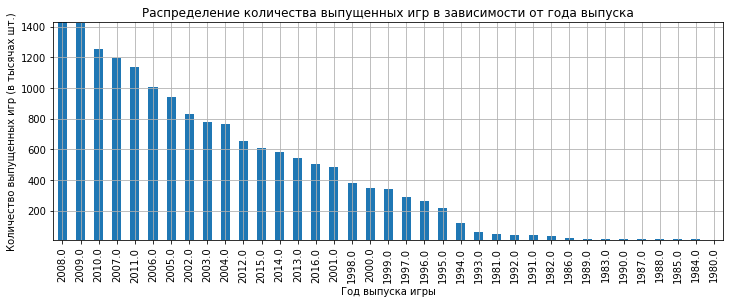

In [19]:
ax = df['year_of_release'].sort_values().value_counts().plot.bar(
    title='Распределение количества выпущенных игр в зависимости от года выпуска', 
    grid=True, figsize=(12,4), ylim=(9, 1427))
                                                             
plt.xlabel('Год выпуска игры')
plt.ylabel('Количество выпущенных игр (в тысячах шт.)')

Теперь, имея такую картину, посмотрим, с чем могут быть связаны пропуски в годах.

In [20]:
df[df['year_of_release'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,nan,Sports,4.26,0.26,0.01,0.71,94.00,8.5,E
377,FIFA Soccer 2004,PS2,nan,Sports,0.59,2.36,0.04,0.51,84.00,6.4,E
456,LEGO Batman: The Videogame,Wii,nan,Action,1.80,0.97,0.00,0.29,74.00,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,nan,Fighting,1.57,1.02,0.00,0.41,nan,NaN,NaN
609,Space Invaders,2600,nan,Shooter,2.36,0.14,0.00,0.03,nan,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,nan,Sports,0.01,0.00,0.00,0.00,43.00,tbd,E10+
16405,Freaky Flyers,GC,nan,Racing,0.01,0.00,0.00,0.00,69.00,6.5,T
16448,Inversion,PC,nan,Shooter,0.01,0.00,0.00,0.00,59.00,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,nan,Adventure,0.01,0.00,0.00,0.00,nan,NaN,NaN


Кроме большого количества нулевых значений по продажам игр, пока не наблюдаем других явных взаимосвязей. Посмотрим на процентное соотношение пропущенных значений к общему количеству значений. И, чтобы не повторять это действие и для других столбцов впоследствии, выведем такое же соотношение для всего датафрейма.

In [21]:
def table_with_num_and_perc(df):
    data_skip = df.isnull().sum().sort_values()
    data_skip_perc = df.isnull().sum().sort_values()/df.shape[0]*100
    skip_table = pd.concat([data_skip, data_skip_perc], axis=1)
    return skip_table

In [22]:
table_with_num_and_perc(df)

,0,1
platform,0,0.00
na_sales,0,0.00
eu_sales,0,0.00
jp_sales,0,0.00
other_sales,0,0.00
name,2,0.01
genre,2,0.01
year_of_release,269,1.61
user_score,6701,40.09
rating,6766,40.48


Как видим, для года выпуска процент пропусков достаточно невысок - 1.61%. Принимаем решение заменить на медианное значение. Однако, чтобы не исказить даже в малости результаты дальнейших изысков, уточним для себя - медиану чего? Для этого ещё раз посмотрим на пропуски в годах.

In [23]:
df[df['year_of_release'].isnull()].head(60)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,nan,Sports,4.26,0.26,0.01,0.71,94.00,8.5,E
377,FIFA Soccer 2004,PS2,nan,Sports,0.59,2.36,0.04,0.51,84.00,6.4,E
456,LEGO Batman: The Videogame,Wii,nan,Action,1.80,0.97,0.00,0.29,74.00,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,nan,Fighting,1.57,1.02,0.00,0.41,nan,NaN,NaN
609,Space Invaders,2600,nan,Shooter,2.36,0.14,0.00,0.03,nan,NaN,NaN
627,Rock Band,X360,nan,Misc,1.93,0.33,0.00,0.21,92.00,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,nan,Adventure,2.15,0.18,0.00,0.07,73.00,tbd,E
678,LEGO Indiana Jones: The Original Adventures,Wii,nan,Action,1.51,0.61,0.00,0.21,78.00,6.6,E10+
719,Call of Duty 3,Wii,nan,Shooter,1.17,0.84,0.00,0.23,69.00,6.7,T
805,Rock Band,Wii,nan,Misc,1.33,0.56,0.00,0.20,80.00,6.3,T


Не имея пока полной причинно-следственной картины, будем отталкиваться от эмпирики. Наибольшую взаимосвязь мы можем наблюдать между пропущенным годом выпуска и нулевыми продажами в Японии. Попробуем использовать найденную закономерность.

In [24]:
df[df['jp_sales']==0]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
61,Just Dance 3,Wii,"2,011.00",Misc,5.95,3.11,0.00,1.06,74.00,7.8,E10+
85,The Sims 3,PC,"2,009.00",Simulation,0.99,6.42,0.00,0.60,86.00,7.6,T
89,Pac-Man,2600,"1,982.00",Puzzle,7.28,0.45,0.00,0.08,nan,NaN,NaN
100,Call of Duty: World at War,X360,"2,008.00",Shooter,4.81,1.88,0.00,0.69,84.00,7.6,M
103,Just Dance,Wii,"2,009.00",Misc,3.48,2.99,0.00,0.73,49.00,8,E10+
...,...,...,...,...,...,...,...,...,...,...,...
16706,Men in Black II: Alien Escape,GC,"2,003.00",Shooter,0.01,0.00,0.00,0.00,nan,tbd,T
16708,Woody Woodpecker in Crazy Castle 5,GBA,"2,002.00",Platform,0.01,0.00,0.00,0.00,nan,NaN,NaN
16709,SCORE International Baja 1000: The Official Game,PS2,"2,008.00",Racing,0.00,0.00,0.00,0.00,nan,NaN,NaN
16711,LMA Manager 2007,X360,"2,006.00",Sports,0.00,0.01,0.00,0.00,nan,NaN,NaN


Как видим, нулевых значений проданных игр в Японии почти в 40 раз больше чем пропущенных значений года выпуска. Возьмём медианный год при нулевом значении продажи игр в Японии.

In [25]:
median_skip_year = df[df['jp_sales']==0]['year_of_release'].median()

In [26]:
median_skip_year

2007.0

Теперь заменим этим значением все пропуски в годах выпуска игр.

In [27]:
df['year_of_release'] = df['year_of_release'].fillna(median_skip_year)

In [28]:
df['year_of_release'].isnull().sum()

0

От пропущенных значений избавились, теперь заменим тип данных на целочисленный.

In [29]:
df['year_of_release'] = df['year_of_release'].astype('int')

In [30]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,nan,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,nan,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,nan,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,nan,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,nan,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,nan,NaN,NaN


С колонкой по годам разобрались. Есть по два пропуска в столбцах с названиями игр и с жанром игр. Посмотрим на них.

In [31]:
df[df['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,nan,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,nan,NaN,NaN


Как и ожидалось, это оказались одни и те же строки. Информативность этих двух строк чуть выше нулевой, за исключением продаж. Суммарное значение продаж - более двух миллионов копий. Первоначальное желание избавиться от этих строк пока не будем спешить реализовывать. Вернёмся к ним, при необходимости, позже, пока же оставим без изменений.

Посмотрим на столбец с оценкой критика

In [32]:
df['critic_score'].value_counts().sort_values().head(60)

21.00      1
17.00      1
13.00      1
22.00      1
20.00      3
29.00      3
98.00      4
24.00      4
23.00      4
19.00      6
25.00      7
27.00      8
31.00      9
34.00     10
97.00     11
28.00     11
30.00     12
26.00     12
32.00     15
95.00     16
96.00     18
33.00     22
36.00     26
40.00     26
35.00     27
37.00     28
41.00     29
38.00     34
42.00     37
94.00     37
39.00     39
45.00     47
93.00     47
44.00     50
92.00     54
43.00     54
46.00     56
47.00     66
48.00     67
91.00     70
52.00     73
90.00     76
50.00     79
49.00     86
51.00     90
54.00    103
53.00    103
89.00    105
55.00    110
56.00    113
88.00    116
87.00    118
57.00    132
86.00    137
58.00    151
85.00    151
60.00    156
59.00    157
61.00    165
64.00    169
Name: critic_score, dtype: int64

In [33]:
df['critic_score'].value_counts().sort_values()

21.00      1
17.00      1
13.00      1
22.00      1
20.00      3
        ... 
73.00    238
78.00    240
75.00    245
71.00    254
70.00    256
Name: critic_score, Length: 82, dtype: int64

Посмотрим, с чем могут быть связаны пропуски значений в этом столбце.

In [34]:
df[df['critic_score'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,nan,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,nan,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,nan,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,nan,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,nan,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,nan,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,nan,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,nan,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,nan,NaN,NaN


Никакой явной взаимосвязи пропущенных значений с информацией из других столбцов не наблюдается. По причине наличия существенной доли пропущенных значений (51.32 %) - принимаем решение оставить пропуски без изменений, дабы в погоне за красотой представления не испортить картину статистической достоверности. Но, поскольку в выведенных выше уникальных значениях, мы не обнаружили после запятой значений отличающихся от нуля, принимаем решение присвоить всем значениям кроме пропущенных целочисленный тип данных. 

In [35]:
df['critic_score'] = df['critic_score'].astype('Int64')

In [36]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


### Объяснить, почему заполнили пропуски определённым образом или почему не стали это делать; Описать причины, которые могли привести к пропускам; Обратить внимание на аббревиатуру 'tbd' в столбцах с рейтингом. Отдельно разобрать это значение и описать, как его обработать;

Посмотрим внимательнее на колонку с рейтингом.

In [37]:
df['rating'].value_counts().sort_values()

AO         1
K-A        3
RP         3
EC         8
E10+    1420
M       1563
T       2961
E       3990
Name: rating, dtype: int64

Не очень (или очень не) понятные аббревиатуры. "Википедия на сей счёт выдаёт следующее":

Entertainment Software Rating Board (ESRB) — негосударственная организация, основное направление деятельности — принятие и определение рейтингов для компьютерных видеоигр и другого развлекательного программного обеспечения в США и Канаде. 

Теперь на счёт аббревиатур:

- «EC» («Early childhood») — «Для детей младшего возраста»: Игра подходит для детей от 3 лет и старше и не содержит материалов, которые родители могли бы счесть неподходящими. Продукты, получившие данный рейтинг, изначально разрабатываются для детей и обычно представляют собой развивающие игры. Некоторые усложнённые развивающие игры могут иметь рейтинг «Everyone».
- «E» («Everyone») — «Для всех»: Содержание вполне подходит для возрастной категории от 6 лет и старше; такие игры могут понравиться и взрослым. Игры с этим рейтингом могут содержать минимальное насилие, в основном «мультяшного» характера. Первой игрой, которая получила данный рейтинг, стала The Simpsons Cartoon Studio, выпущенная в 1996 году. Первоначально "K-A" ("Kids to Adults")
- «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»: Проекты с данным рейтингом могут содержать немного больше мультипликационного или мягкого насилия, или несколько откровенные сцены или минимальное количество крови. Рейтинг был принят ESRB 2 марта 2005 года. Первой игрой, которая получила данный рейтинг, стала Donkey Kong: Jungle Beat.
- «T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет и старше. Проекты из данной категории могут содержать насилие, непристойные сцены, грубый юмор, в меру откровенное сексуальное содержимое, кровь или нечастое использование ненормативной лексики.
- «M» («Mature») — «Для взрослых»: Материалы игры не подходят для подростков младше 17 лет. Проекты с данным рейтингом могут содержать достаточно жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику, нежелательную для младшей аудитории.
- «AO» («Adults Only 18+») — «Только для взрослых»: Содержание игры только для взрослых старше 18 лет. Продукты из данной категории могут содержать длительные сцены жестокого насилия и/или очень откровенное сексуальное содержимое, а также сцены с обнажением. Большинство таких игр предназначены для персональных компьютеров под управлением Microsoft Windows и Apple Macintosh. Рейтинг «Только для взрослых» является предметом многочисленных дискуссий, так как накладывает серьёзные ограничения на продажи игры.
- «RP» («Rating Pending») — «Рейтинг ожидается»: Продукт был отправлен в ESRB и ожидает присвоения рейтинга. Данный логотип используется только на рекламных презентациях и в демо-версиях игр до официальной даты выпуска в продажу.

Есть ещё одна довольно любопытная информация, почерпнутая там же, в "Википедии":

Процесс присвоения рейтинга
Для определения рейтинга издатель присылает в ESRB видеоролик, который содержит наиболее впечатляющие и резкие сцены игры. Также издатель заполняет специальную анкету сведениями о содержании игры.

На веб-сайте ESRB сообщается, что затем рецензенты независимо оценивают продукт и определяют рейтинг. Оценкой рейтинга занимаются многие люди разных возрастов и слоёв общества. Это могут быть бывшие школьные учителя, родители, профессионалы и различные работники из других сфер деятельности, не связанные с игровой индустрией. Если рецензенты сходятся в оценке, то к рейтингу добавляют краткие описания и ESRB уведомляет издателя о своём решении.

Когда игра готова к продаже, издатель отправляет копии финальной версии в ESRB. Подвергается осмотру упаковка игры, а предоставленные издателем сведения о содержании игры обычно проверяются путём её тестирования. **Если игра оказывается более жёсткой, чем было представлено в видеоролике, или покупатели высказываются о несоответствии рейтинга и содержимого продукта, к издателю могут быть применены различные санкции.**

Обратим ещё раз внимание на последнее предложение из цитаты из "Википедии" и попробуем выжать из неё суть. Если производитель игр не уверен в том, что его игра гарантированно подпадает под соответствие рейтингу - он может не подать заявку в ESRB - дабы не попасть под санкции этой организации. Согласно законам логики вроде бы ничто не мешает сделать такой вывод, поскольку следствие закономерно истекает из посылки. За неимением иных гипотез, возьмём эту гипотезу в качестве рабочей. Будем исходить из того, что пропущенные значения в столбце с рейтингом есть ничто иное, как нежелание производителя попдпасть под санкции ESRB, а значит - отсутствие подачи заявки на присвоение рейтинга этой организацией. А значит - заменим все пропущенные значения чем-то вроде "notESRB". 

Да, и ещё маленькая зарубочка на память - если исходить из вышеприведённой аргументации, то косвенно это может указывать на то, что игры, которые в последующем будут находиться под меткой notESRB - потенциально не очень детские. Прямых доказательств тому ноль - только косвенные.

In [38]:
df['rating'] = df['rating'].fillna('notESRB')

In [39]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,notESRB
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,notESRB
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,notESRB
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,notESRB
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,notESRB
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,notESRB


Есть ещё один нюанс, обращающий на себя внимание. В колонке с рейтингом, мы видим значения Е и К-А. Хотя, как мы помним из Википедии это одно и то же. «E» («Everyone») — «Для всех»; первоначально "K-A" ("Kids to Adults"). Заменим изначальные К-А на Е.

In [40]:
df['rating'] = df['rating'].str.replace('K-A', 'E')

In [41]:
df['rating'].value_counts().sort_values()

AO            1
RP            3
EC            8
E10+       1420
M          1563
T          2961
E          3993
notESRB    6766
Name: rating, dtype: int64

Для удобства дальнейшей работы создадим список, содержащий расшифровку всех аббревиатур рейтинга. Можно было бы создать отдельный столбец с расшифровкой, но кроме того, что это утяжелит таблицу, кириллица по соседству с латиницей может однажды ввести в заблуждение при работе. Удовлетворимся переменной.

In [42]:
rating_names = ['«EC» («Early childhood») — «Для детей младшего возраста»', '«E» («Everyone») — «Для всех»', 
                '«E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»', '«T» («Teen») — «Подросткам»', 
                '«M» («Mature») — «Для взрослых»', '«AO» («Adults Only 18+») — «Только для взрослых»', 
                '«RP» («Rating Pending») — «Рейтинг ожидается»', '"notESRB" - "пропущенные значения"']

In [43]:
rating_names

['«EC» («Early childhood») — «Для детей младшего возраста»',
 '«E» («Everyone») — «Для всех»',
 '«E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»',
 '«T» («Teen») — «Подросткам»',
 '«M» («Mature») — «Для взрослых»',
 '«AO» («Adults Only 18+») — «Только для взрослых»',
 '«RP» («Rating Pending») — «Рейтинг ожидается»',
 '"notESRB" - "пропущенные значения"']

Посмотрим на столбец с оценкой пользователя

In [44]:
df['user_score'].value_counts().sort_values()

9.7       1
0         1
0.7       2
0.5       2
2.3       2
       ... 
8.3     254
8.2     282
8       290
7.8     324
tbd    2424
Name: user_score, Length: 96, dtype: int64

Как видим, максимальное количествозначений этой колонки принадлежит некоторому загадочному "tbd". В ответ на наш вопрос поисковая система "Яндекс" отвечает, что tbd это - "To Be Determined", то есть "Будет определено" или "Подлежит определению". 

Стало быть, tbd - в данной ситуации равносильно пропущенному значению, поскольку оценка пользователя ещё не определена или не дана. Как мы помним, пропущенных значений в этой колонки достаточно большое количество - 40.09 %. Поставим знак равенства между NaN и tbd. 

In [45]:
df['user_score'] = df['user_score'].fillna('tbd')

In [46]:
df['user_score'].value_counts().sort_values()

9.7       1
0         1
0.7       2
0.5       2
2.3       2
       ... 
8.3     254
8.2     282
8       290
7.8     324
tbd    9125
Name: user_score, Length: 96, dtype: int64

Никакое численное значение, по крайней мере пока, задавать tbd не будем.
Тип данных этой колонки оставим в неизменности, поскольку значения представляются валидными 

Посмотрим на дубликаты

In [47]:
df.duplicated().sum()

0

### Посчитать суммарные продажи во всех регионах и записать их в отдельный столбец.

Создадим дополнительную колонку.

In [48]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,tbd,notESRB
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,tbd,notESRB


In [49]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

In [50]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,tbd,notESRB,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,tbd,notESRB,31.38


## Шаг 3. Провести исследовательский анализ данных

- Посмотреть, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
- Посмотреть, как менялись продажи по платформам. Выбрать платформы с наибольшими суммарными продажами и построить распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
- Взять данные за соответствующий **актуальный период**. Актуальный период определить самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
- Не учитывать в работе данные за **предыдущие годы**.
- Какие платформы лидируют по продажам, растут или падают? Выбрать несколько потенциально прибыльных платформ.
- Построить график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Описать результат.
- Посмотреть, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построить диаграмму рассеяния и посчитать корреляцию между отзывами и продажами. Сформулировать выводы.
- Соотнести выводы с продажами игр на других платформах.
- Посмотреть на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

### Посмотреть, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

Вспомним гистограмму, в которой мы выводилизависимость продаж игр от года выпуска

Text(0, 0.5, 'Количество выпущенных игр (в тысячах шт.)')

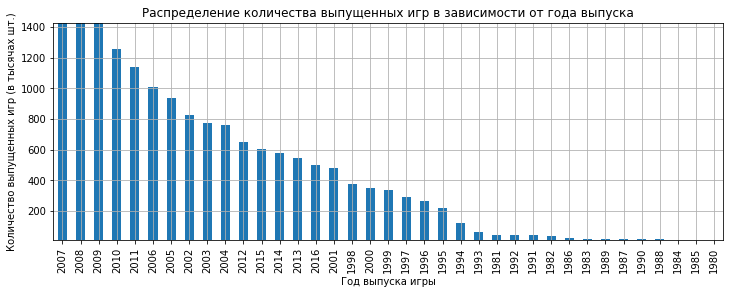

In [51]:
ax = df['year_of_release'].sort_values().value_counts().plot.bar(
    title='Распределение количества выпущенных игр в зависимости от года выпуска', 
    grid=True, figsize=(12,4), ylim=(9, 1427))
                                                             
plt.xlabel('Год выпуска игры')
plt.ylabel('Количество выпущенных игр (в тысячах шт.)')

Посмотрим на значения с точки зрения года выпуска, а не количества выпущенных игр

Text(0, 0.5, 'Количество выпущенных игр (в тысячах шт.)')

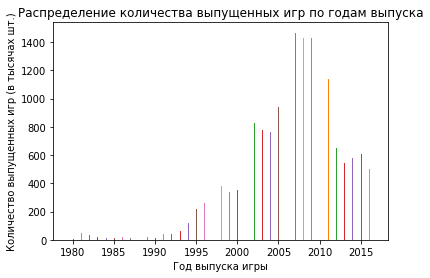

In [52]:
quantity_games = df.groupby('year_of_release')['year_of_release']
quantity_games.plot(kind='hist', title='Распределение количества выпущенных игр по годам выпуска')

plt.xlabel('Год выпуска игры')
plt.ylabel('Количество выпущенных игр (в тысячах шт.)')

Как видим, количество выпущенных игр неизменно росло вплоть до 2007 года. Этот год являлся пиком по количеству выпущенных игр. А потом, в 2008 году наступил мировой финансовый кризис. Кризис в банковском секторе привел к снижению объёмов кредитования реальной экономики. Кризис сработал по принципу «домино», потянув за собой строительный сектор, машиностроение, сферу услуги и, естественно, игровую индустрию. (Подробнее об этом: https://dtf.ru/gameindustry/65407-igrovaya-industriya-i-finansovyy-krizis-2008-goda). Начиная с 2008 года мы наблюдаем постепенное сокращение производства игр. Кривая падения более или менее выравнивается только к 2012 году.

### Посмотреть, как менялись продажи по платформам. Выбрать платформы с наибольшими суммарными продажами и построить распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

Выберем пять платформ с максимальным количеством продаж.

In [53]:
platform_sales = df.groupby('platform').agg({'total_sales':['sum']})

In [54]:
platform_sales

,total_sales
,sum
platform,
2600,96.98
3DO,0.10
3DS,259.00
DC,15.95
DS,806.12
GB,255.46
GBA,317.85
GC,198.93


Text(0, 0.5, 'Количество проданных игр (в миллионах шт.)')

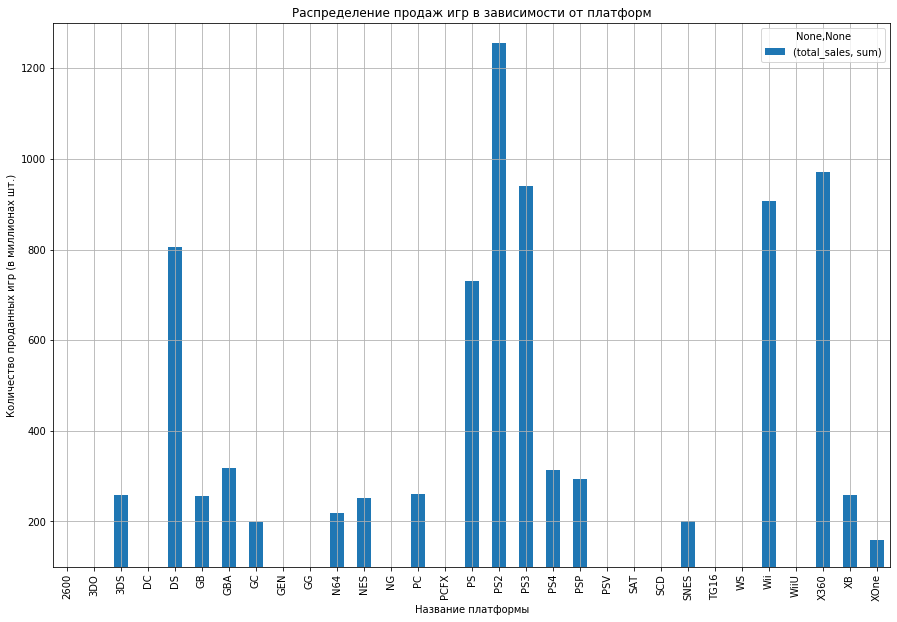

In [55]:
ax = platform_sales.plot.bar(
    title='Распределение продаж игр в зависимости от платформ', 
    grid=True, figsize=(15, 10), ylim=(100, 1300))
                                                             
plt.xlabel('Название платформы')
plt.ylabel('Количество проданных игр (в миллионах шт.)')

Итак, платформы-лидеры по продажам игр (в порядке убывания):
- PS2
- X360
- PS3
- Wii
- DS

Посмотрим на динамику продаж по годам для каждой платформы-лидера.

Напишем функцию для построения графиков для каждой из пяти платформ-лидеров.

In [56]:
def build_platform_bar(value, title):
    platform = df[df['platform']==value]
    pivot_df = platform.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
    ax = pivot_df.plot.bar(title=title, 
                           grid=True, figsize=(15, 10), ylim=(0, 250))
                                                             
    plt.xlabel('Год выпуска')
    plt.ylabel('Количество проданных игр (в миллионах шт.)')
    

1 место. Платформа 'PS2'

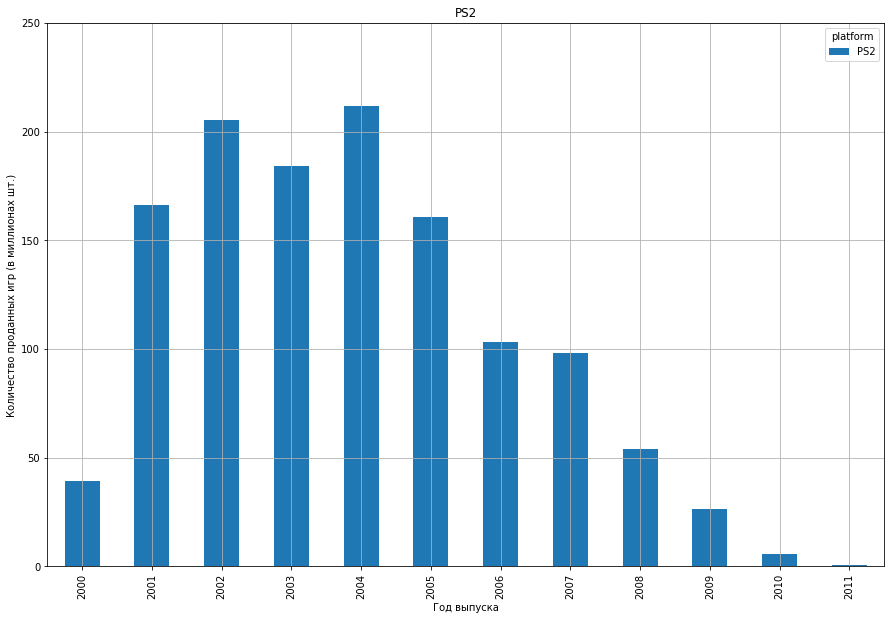

In [57]:
build_platform_bar('PS2', 'PS2')

2 место. Платформа 'X360'

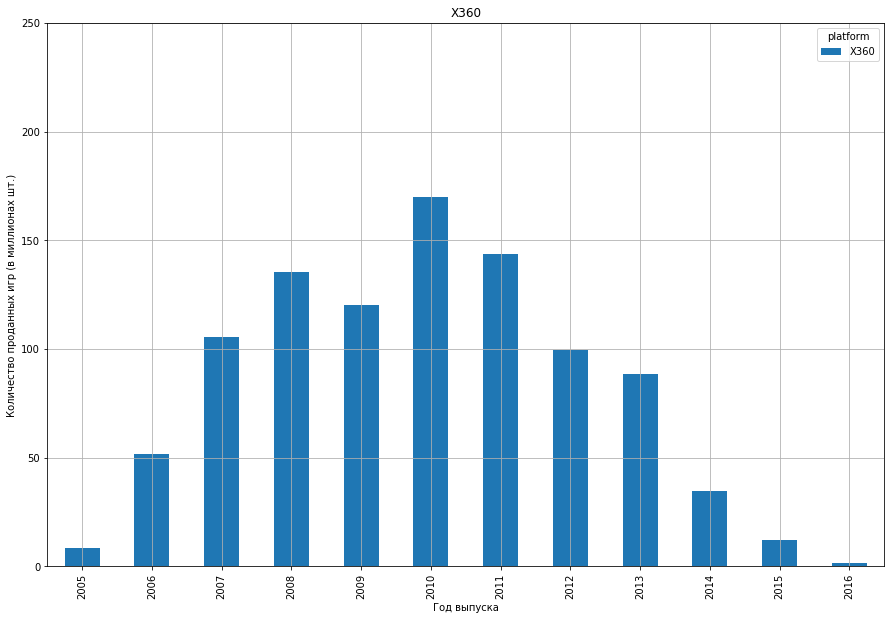

In [58]:
build_platform_bar('X360', 'X360')

3 место. Платформа 'PS3'

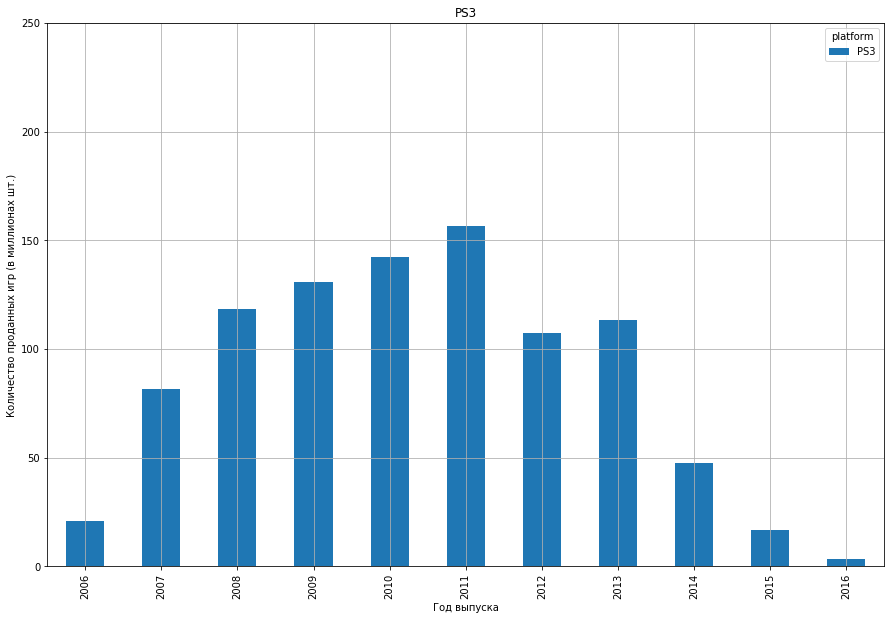

In [59]:
build_platform_bar('PS3', 'PS3')

4 место. Платформа 'Wii' 

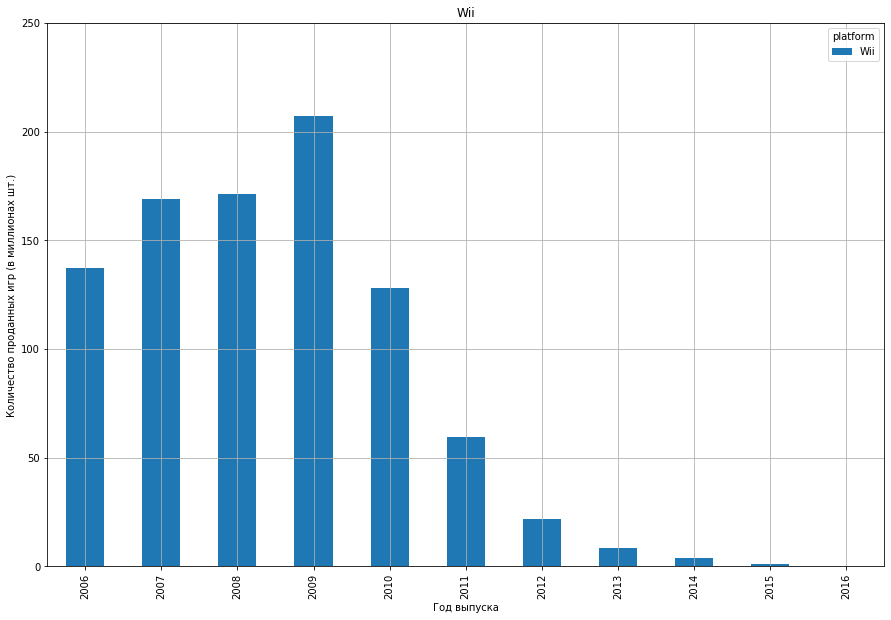

In [60]:
build_platform_bar('Wii', 'Wii')

5 место. Платформа 'DS'

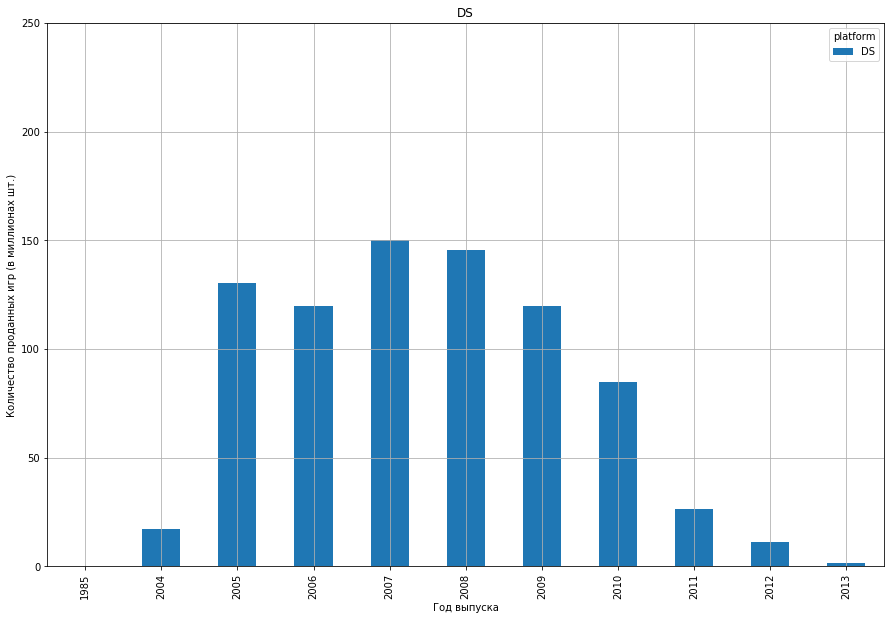

In [61]:
build_platform_bar('DS', 'DS')

На всех представленных графиках мы можем наблюдать срок жизни платформ - 11, 12 лет. Какие-то платформы резко стартуют, набирая большое количество продаж (Платформы 'Wii', 'PS2'), другие плавно стартуют и плавно финишируют. Общим, кроме срока жизни, для них также является то, что после пика своей популярности происходит неизменное падение продаж. Приходит новая платформа и занимает место старой. 

### Взять данные за соответствующий актуальный период. Актуальный период определить самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год. Не учитывать в работе данные за предыдущие годы. Какие платформы лидируют по продажам, растут или падают? Выбрать несколько потенциально прибыльных платформ.

Для определения актуальных и потенциально привлекательных на 2017 год платформ, будем опираться на следующие критерии:

- суммарное количество продаж игр на платформе составляет не менее 200 млн. экземпляров
- актуальными будем считать последние 4 года
- продажа в актуальные годы (хотя бы последние три) составляет не менее 50 млн

Для определения потенциально привлекательных платформ снова оценим график 'Распределение продаж игр в зависимости от платформ'

Text(0, 0.5, 'Количество проданных игр (в миллионах шт.)')

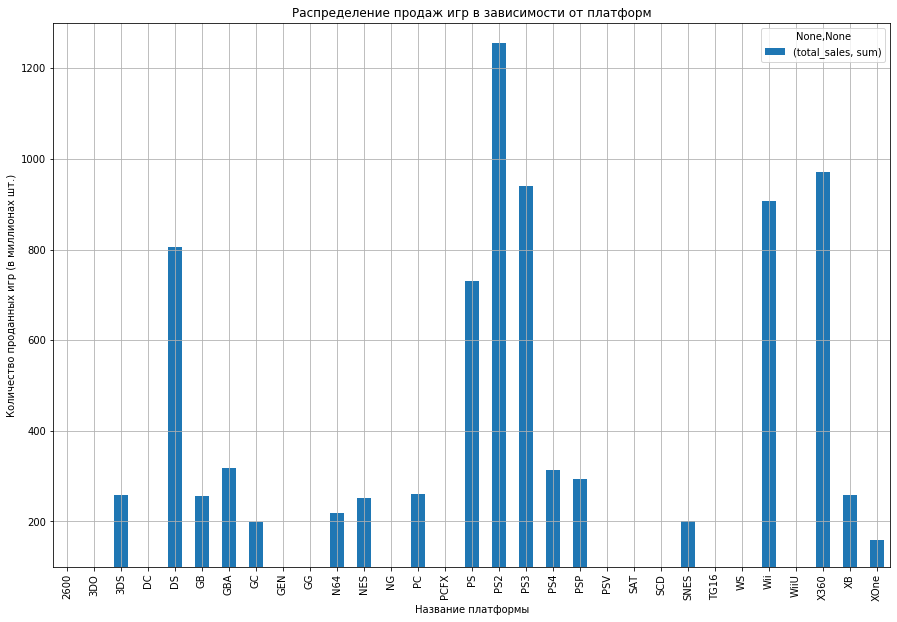

In [62]:
ax = platform_sales.plot.bar(
    title='Распределение продаж игр в зависимости от платформ', 
    grid=True, figsize=(15, 10), ylim=(100, 1300))
                                                             
plt.xlabel('Название платформы')
plt.ylabel('Количество проданных игр (в миллионах шт.)')

Как видим по критерию минимально приемлемого количества продаж игр подходит 15 платформ. 10 из них - платформы-лидеры, мы исключим, как выработавших свой ресурс. Проверим оставшиеся 10. Для этого немного модернизируем предыдущую функцию.

In [63]:
def perspective_platform(value, title):
        
    platform = df[(df['platform']==value) & (df['year_of_release']>2012)]
    pivot_df = platform.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
    ax = pivot_df.plot.bar(title=title, 
                           grid=True, figsize=(15, 10), ylim=(0, 250))
                                                             
    plt.xlabel('Год выпуска')
    plt.ylabel('Количество проданных игр (в миллионах шт.)')

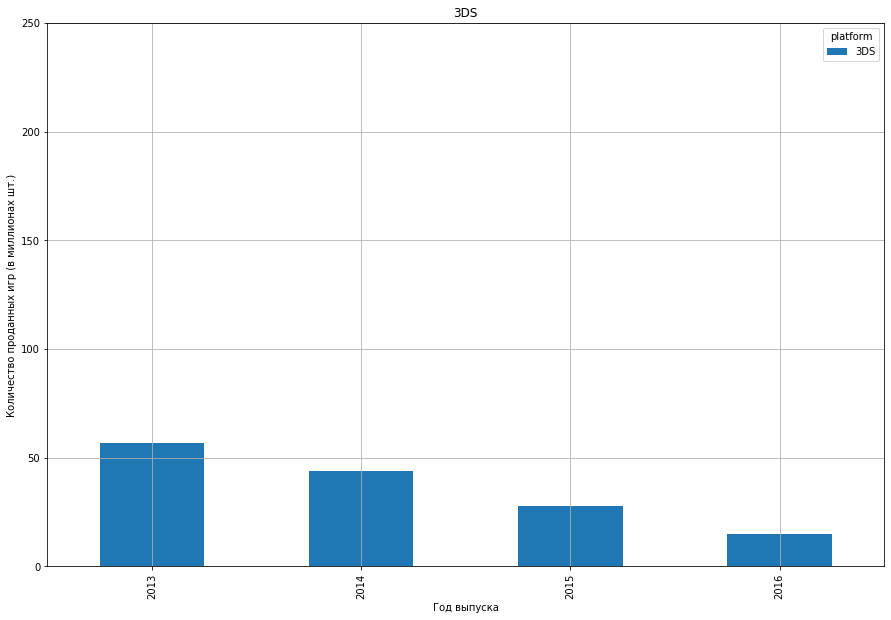

In [64]:
perspective_platform('3DS', '3DS')

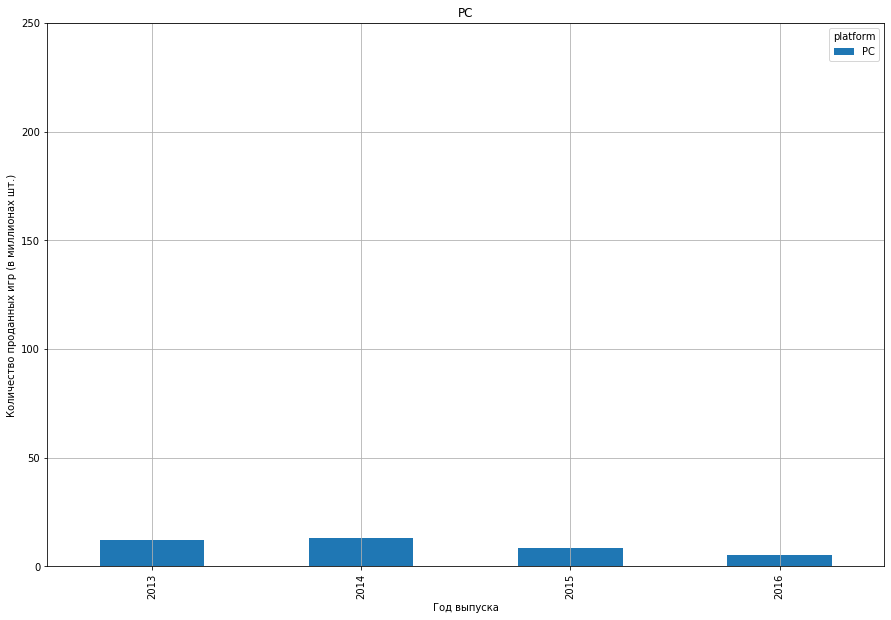

In [65]:
perspective_platform('PC', 'PC')

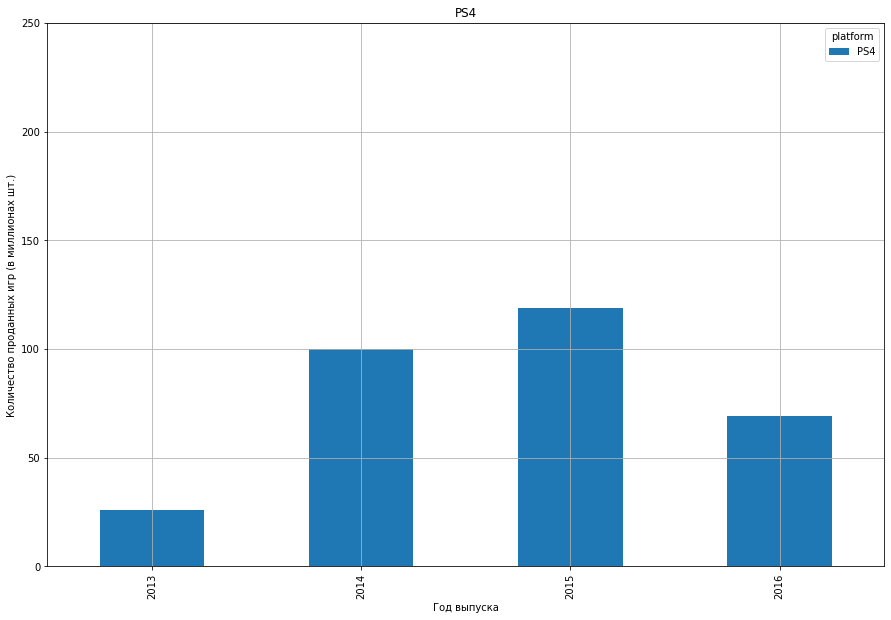

In [66]:
perspective_platform('PS4', 'PS4')

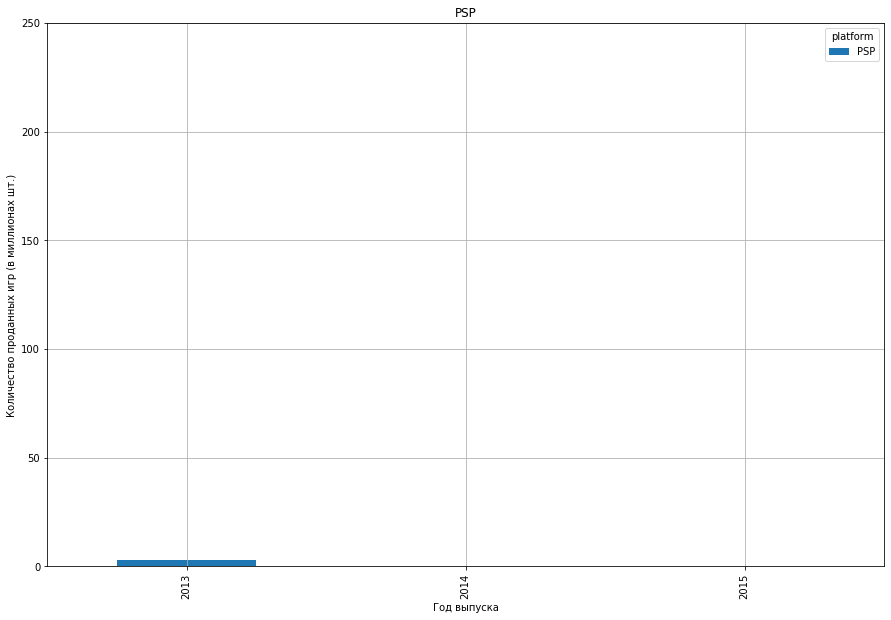

In [67]:
perspective_platform('PSP', 'PSP')

Сработали по запросу (прошли отбор по годам) только четыре, из них устраивает по критерию преодоления ежегодного 50-ти миллионного барьера только одна - "PS4". И, хоть в последний 2016 год эта платформа и отстаёт от других годов по продажам, это может объясняться двумя причинами: неполный сбор статистики за текущий 2016 год, либо откат перед будущим подъёмом, что приходилось наблюдать у платформ-лидеров. Для верности проверим четыре оставшихся потенциально привлекательных платформы, правда не сумевших преодолеть суммарный 200-миллионный барьер. Это 'GC', 'SNES', 'XOne'.

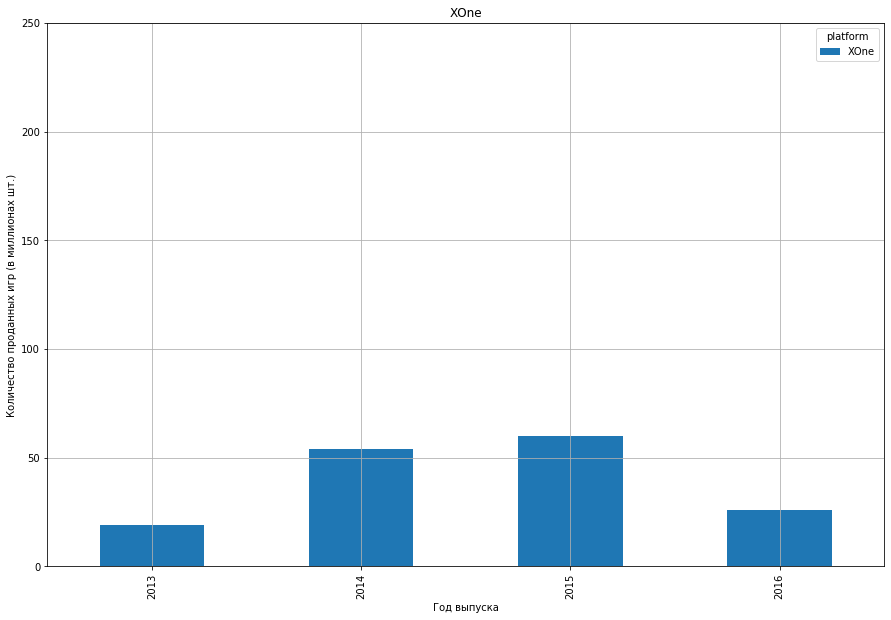

In [68]:
perspective_platform('XOne', 'XOne')

Из трёх оставшихся платформ рубеж актуальных годов смогла преодолеть только платформа 'XOne'. Итого, мы имеем тройку лидеров, которые могли бы оказаться перспективными, потенциально прибыльными в 2017 году. Добавим к этой тройке ещё две платформы наиболее привлекательные по сравнению с оставшимися. Это угасающий лидер 'X360' и платформа 'WiiU'

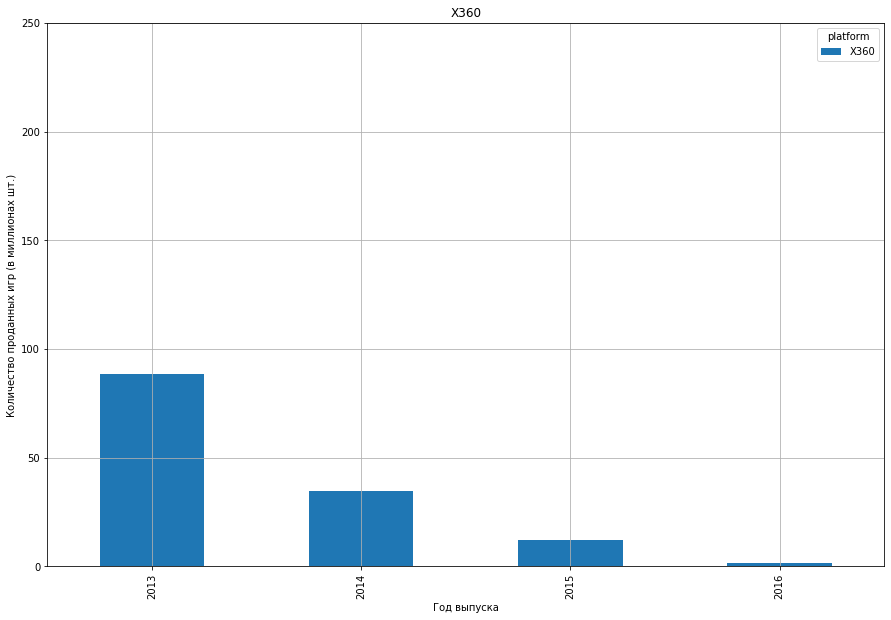

In [69]:
perspective_platform('X360', 'X360')

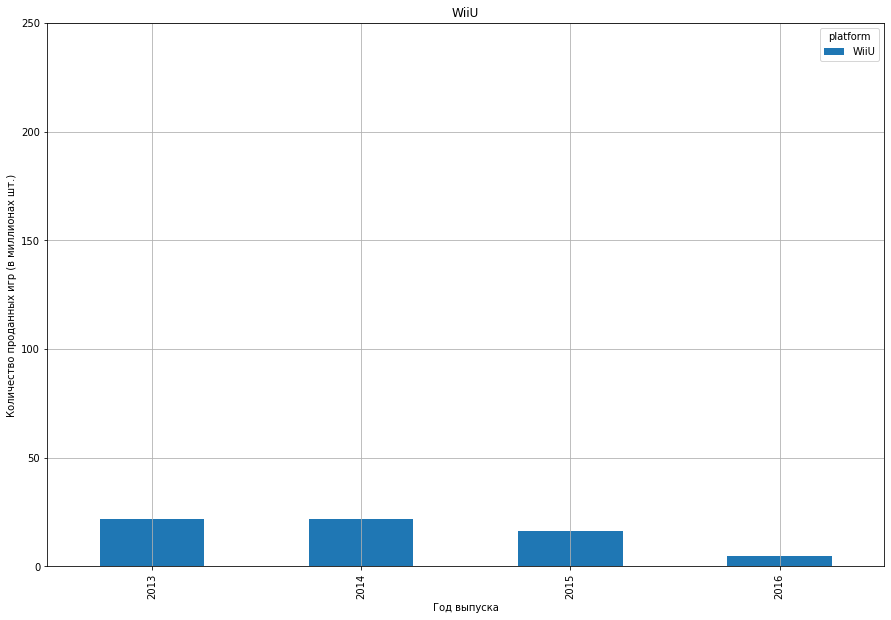

In [70]:
perspective_platform('WiiU', 'WiiU')

Итого мы имеем пятёрку потенциально прибыльных платформ, это:
- 'WiiU'
- 'X360'
- 'XOne'
- 'PS4'
- '3DS'

### Построить график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Описать результат.

In [71]:
perspective_platform_box = df.loc[(df['platform'] == 'PS4') | (df['platform'] == '3DS') | (df['platform'] == 'XOne') 
       | (df['platform'] == 'X360') | (df['platform'] == 'WiiU')]

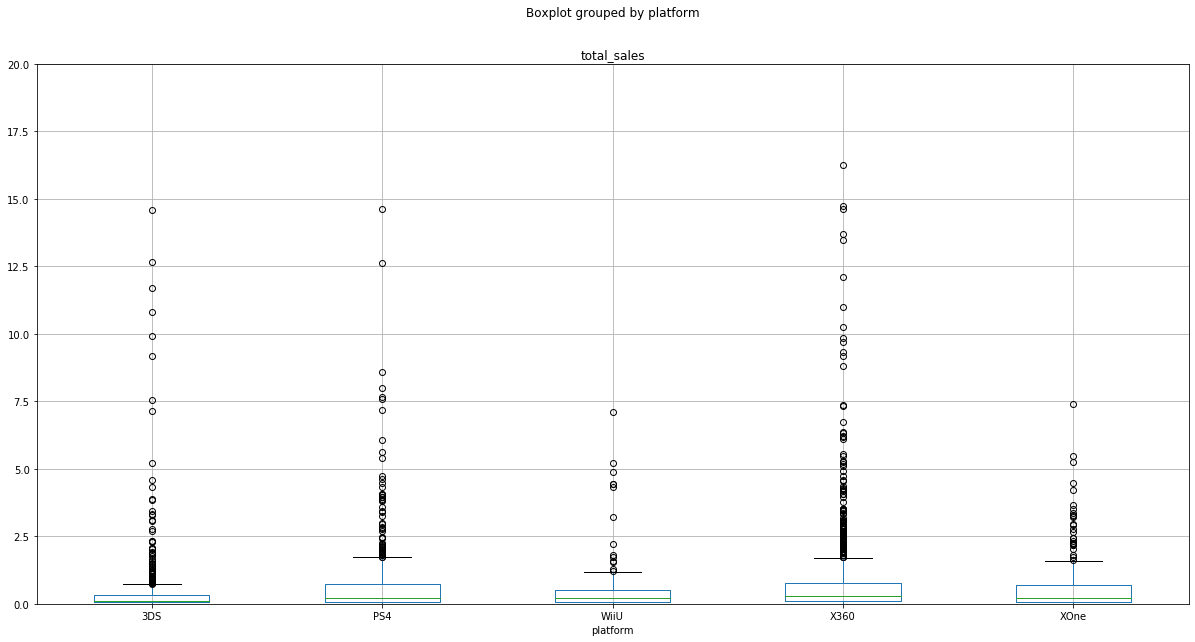

In [72]:
plot = perspective_platform_box.boxplot('total_sales', by='platform', figsize=(20, 10)).set_ylim(0, 20)

Приблизим для рассмотрения ящики с усами, отсекая выбросы

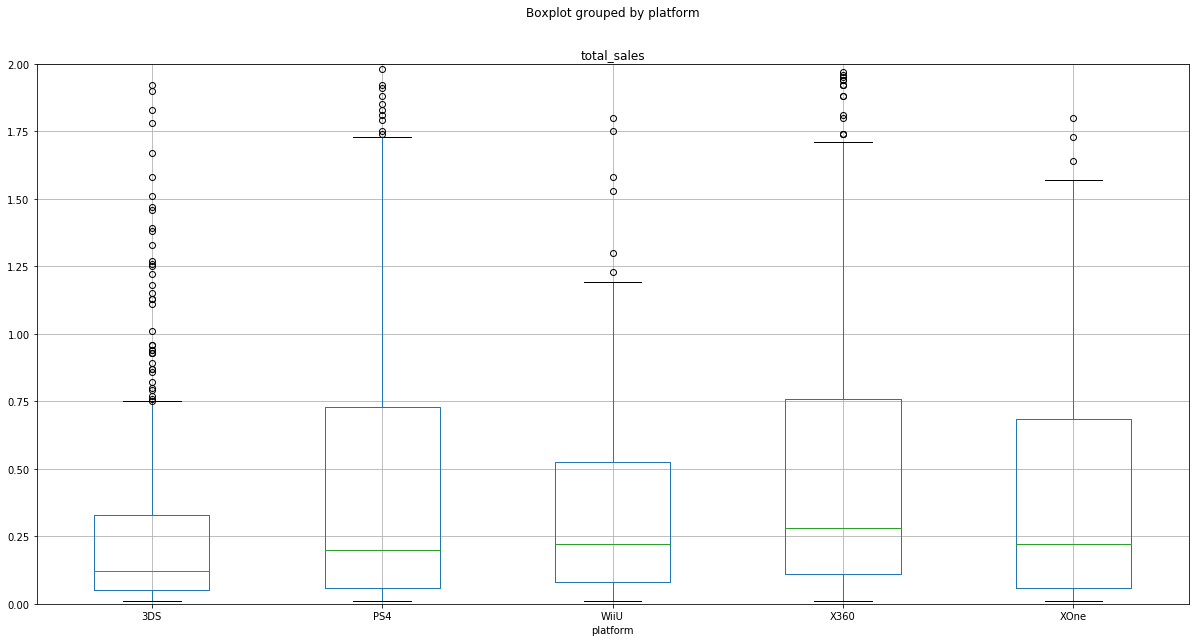

In [73]:
plot = perspective_platform_box.boxplot('total_sales', by='platform', figsize=(20, 10)).set_ylim(0, 2)

In [74]:
perspective_platform_box.groupby('platform')['total_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,520.00,0.50,1.43,0.01,0.05,0.12,0.33,14.60
PS4,392.00,0.80,1.61,0.01,0.06,0.20,0.73,14.63
WiiU,147.00,0.56,1.06,0.01,0.08,0.22,0.53,7.09
X360,"1,262.00",0.77,1.62,0.01,0.11,0.28,0.76,21.82
XOne,247.00,0.65,1.04,0.01,0.06,0.22,0.69,7.39


Как видим по медианам продаж на перспективных платформах соблюдается относительный паритет. Если обратить внимания на края статистически значимой выборки (без выбросов) - максимальные значения нормального распределения - наиболее перспективной платформой представляется PS4, наименее - 3DS. В подтверждение перспективности платформы PS4 заметим также, что её 3-я квартиль отличается в меньшую сторону всего на три сотых единицы от одного из бывших лидеров продаж платформы 3DS. С другой стороны, нельзя также списывать со счетов и такие платформы, как WiiU и XOne, медианы продаж которых выше медианы PS4.

### Посмотреть, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построить диаграмму рассеяния и посчитать корреляцию между отзывами и продажами. Сформулировать выводы. Соотнести выводы с продажами игр на других платформах.

In [75]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,tbd,notESRB,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,tbd,notESRB,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,tbd,notESRB,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,tbd,notESRB,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,tbd,notESRB,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,tbd,notESRB,0.01


Для корректной работы со столбцом оценок пользователей заменим все "tbd" на "NaN". Напомним, что tbd это - "To Be Determined", то есть "Будет определено" или "Подлежит определению". В данном случае представляется корректным воспринимать это как пропущенное значение.

In [76]:
df['user_score'] = df['user_score'].replace('tbd', np.nan)

In [77]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,notESRB,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,notESRB,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,notESRB,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,notESRB,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,notESRB,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,notESRB,0.01


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16715 non-null int64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null Int64
user_score         7590 non-null object
rating             16715 non-null object
total_sales        16715 non-null float64
dtypes: Int64(1), float64(5), int64(1), object(5)
memory usage: 1.5+ MB


In [79]:
df.apply(pd.to_numeric, errors='ignore')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.00,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,nan,notESRB,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.30,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.00,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,nan,notESRB,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,nan,notESRB,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,nan,notESRB,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,nan,notESRB,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,nan,notESRB,0.01


In [80]:
df['user_score'] = df['user_score'].apply(pd.to_numeric, errors='coerce')

In [81]:
df['user_score'] = df['user_score'].round()

In [82]:
df['user_score'] = df['user_score'].astype('Int64')

In [83]:
df['total_sales'] = df['total_sales'].round()

In [84]:
df['total_sales'] = df['total_sales'].astype('Int64')

In [85]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8,E,83
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,notESRB,40
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8,E,36
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8,E,33
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,notESRB,31
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,notESRB,0
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,notESRB,0
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,notESRB,0
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,notESRB,0


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16715 non-null int64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null Int64
user_score         7590 non-null Int64
rating             16715 non-null object
total_sales        16715 non-null Int64
dtypes: Int64(3), float64(4), int64(1), object(4)
memory usage: 1.6+ MB


При оценке силы связи коэффициентов корреляции воспользуемся шкалой Чеддока:


Анализ силы связи между переменными

 - Значение	        Интерпретация
 - от 0 до 0,3	    очень слабая
 - от 0,3 до 0,5	слабая
 - от 0, 5 до 0,7	средняя
 - от 0,7 до 0, 9	высокая
 - от 0,9 до 1	    очень высокая

Вспомним названия перспективных платформ

In [87]:
perspective_platform_box['platform'].unique()

array(['X360', 'PS4', '3DS', 'XOne', 'WiiU'], dtype=object)

In [88]:
def cor_of_score(type_score, type_plat):

    plat = df[df['platform']==type_plat]
    corr_score = plat[['total_sales', type_score]].corr()
    return corr_score

In [89]:
def score_of_platform(type_score, type_plat):

    plat = df[df['platform']==type_plat]
    return plat.plot(x=type_score, y='total_sales', kind='scatter') 

,total_sales,critic_score
total_sales,1.00,0.36
critic_score,0.36,1.00


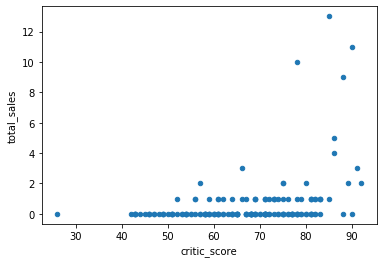

In [90]:
score_of_platform('critic_score', '3DS')
cor_of_score('critic_score', '3DS')

Корреляция между оценками критиков и продажами игр на платформе '3DS' - слабая

,total_sales,user_score
total_sales,1.00,0.21
user_score,0.21,1.00


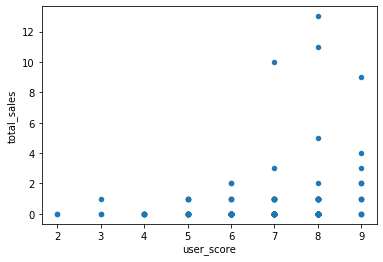

In [91]:
score_of_platform('user_score', '3DS')
cor_of_score('user_score', '3DS')

Корреляция между оценками пользователей и продажами игр на платформе '3DS' - очень слабая

,total_sales,critic_score
total_sales,1.00,0.40
critic_score,0.40,1.00


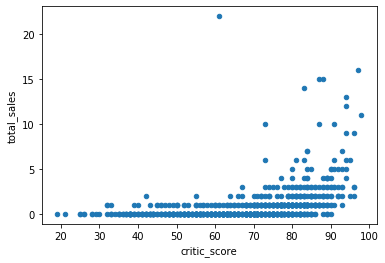

In [92]:
score_of_platform('critic_score', 'X360')
cor_of_score('critic_score', 'X360')

,total_sales,user_score
total_sales,1.00,0.11
user_score,0.11,1.00


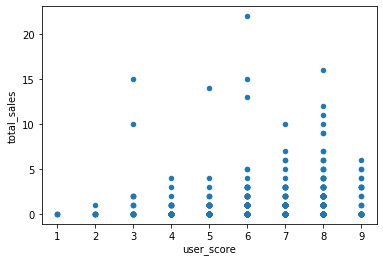

In [93]:
score_of_platform('user_score', 'X360')
cor_of_score('user_score', 'X360')

Как и для предыдущей платформы корреляция продаж на платформе 'X360' оказалась слабой с оценками критиков и очень слабой с оценками пользователей

,total_sales,critic_score
total_sales,1.00,0.40
critic_score,0.40,1.00


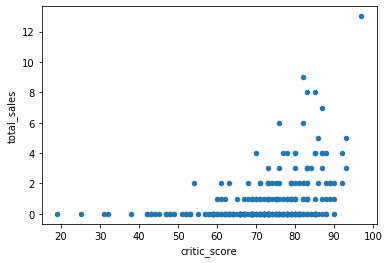

In [94]:
score_of_platform('critic_score', 'PS4')
cor_of_score('critic_score', 'PS4')

,total_sales,user_score
total_sales,1.00,-0.05
user_score,-0.05,1.00


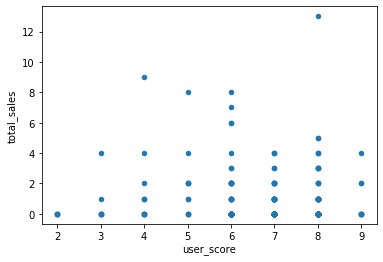

In [95]:
score_of_platform('user_score', 'PS4')
cor_of_score('user_score', 'PS4')

Мы наблюдаем слабую корреляцию продаж игр на платформе 'PS4' с оценками критиков и очень слабую обратную корреляцию с оценками пользователей.

,total_sales,critic_score
total_sales,1.00,0.39
critic_score,0.39,1.00


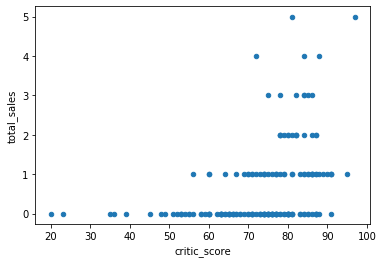

In [96]:
score_of_platform('critic_score', 'XOne')
cor_of_score('critic_score', 'XOne')

,total_sales,user_score
total_sales,1.00,-0.09
user_score,-0.09,1.00


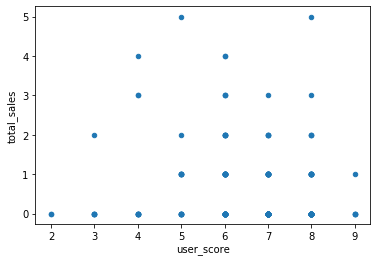

In [97]:
score_of_platform('user_score', 'XOne')
cor_of_score('user_score', 'XOne')

Мы наблюдаем слабую корреляцию продаж игр на платформе 'XOne' с оценками критиков и очень слабую обратную корреляцию с оценками пользователей.

,total_sales,critic_score
total_sales,1.00,0.37
critic_score,0.37,1.00


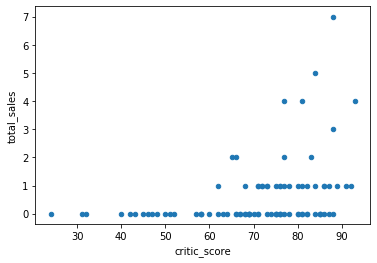

In [98]:
score_of_platform('critic_score', 'WiiU')
cor_of_score('critic_score', 'WiiU')

,total_sales,user_score
total_sales,1.00,0.43
user_score,0.43,1.00


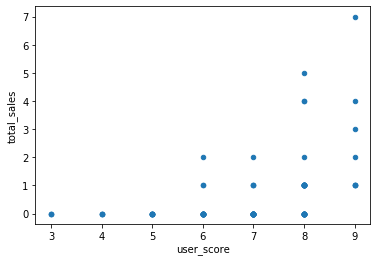

In [99]:
score_of_platform('user_score', 'WiiU')
cor_of_score('user_score', 'WiiU')

Продажи на платформе 'WiiU' слабо коррелируют и с оценками критиков, и с оценками пользователей.

Выводы:

Оценки критиков и пользователей имеют слабую или очень слабую корреляцию с продажей игр на платформе. Такая ситуация в равной мере характерна для всех пяти перспективных платформ, которые мы выделили ранее.

### Посмотреть на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [100]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8,E,83
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,notESRB,40
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8,E,36
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8,E,33
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,notESRB,31
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,notESRB,0
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,notESRB,0
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,notESRB,0
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,notESRB,0


In [101]:
genre_sales = df.pivot_table(index='genre', values='total_sales', aggfunc='sum')

In [102]:
sort_genre = genre_sales.sort_values(by='total_sales')

In [103]:
sort_genre

,total_sales
genre,
Strategy,119
Adventure,141
Puzzle,196
Simulation,313
Fighting,371
Racing,611
Misc,636
Platform,760
Role-Playing,812


Text(0, 0.5, 'Количество проданных игр (в миллионах шт.)')

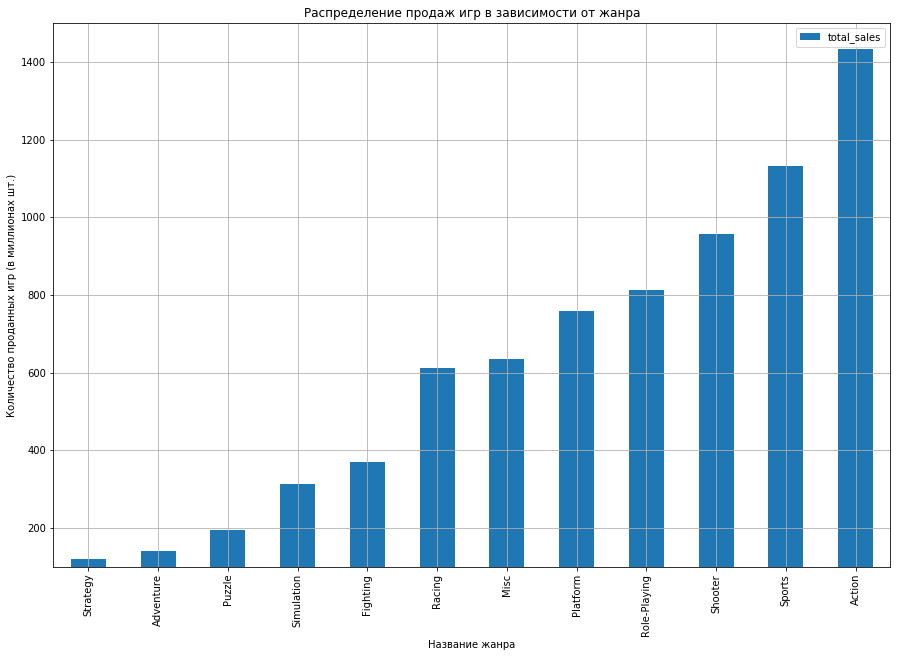

In [104]:
ax = sort_genre.plot.bar(
    title='Распределение продаж игр в зависимости от жанра', 
    grid=True, figsize=(15, 10), ylim=(100, 1500))
                                                             
plt.xlabel('Название жанра')
plt.ylabel('Количество проданных игр (в миллионах шт.)')

Самый популярный (прибыльный) жанр - Action. Этот жанр больше чем на порядок по принесению прибыли отличается от самого низкодоходного - Strategy.	

## Шаг 4. Составить портрет пользователя каждого региона

Определить для пользователя каждого региона (NA, EU, JP):

Самые популярные платформы (топ-5). Описать различия в долях продаж.
Самые популярные жанры (топ-5). Пояснить разницу.
Влияет ли рейтинг ESRB на продажи в отдельном регионе?

Уменьшим таблицу до необходимого нам, с точки зрения актуальности, срока давности. В прошлый раз, при определении пяти перспективных платформ, мы отталкивались от 2013 года. Для определения для пользователя каждого из представленных регионов по пять платформ, такого срока может быть недостаточно, поэтому увеличим срок рассмотрения на 2 года (учитывая, что жизнь платформы длится в среднем 11 лет, вряд ли такое увеличение негативно отразится на результатах). Будем рассматривать данные начиная с 2011 года

In [105]:
df_for_portrait = df[df['year_of_release']>2010]

In [106]:
df_for_portrait

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8,M,21
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8,M,16
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88,3,M,15
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,notESRB,15
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,notESRB,15
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,notESRB,0
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,notESRB,0
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,notESRB,0
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,notESRB,0


Text(0, 0.5, 'Количество проданных игр (в миллионах шт.)')

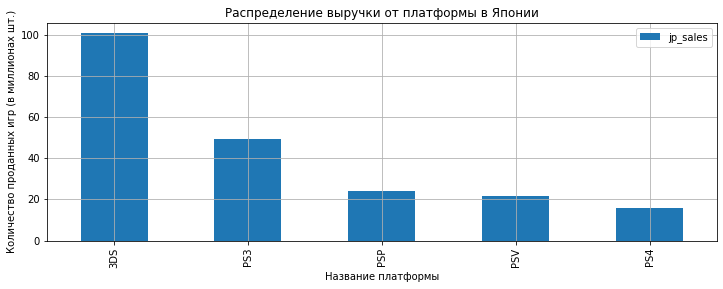

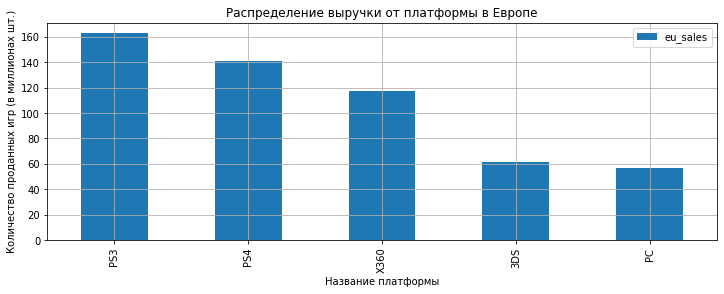

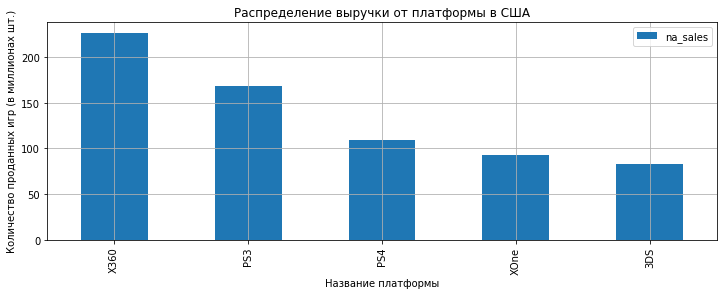

In [107]:
df_for_portrait.groupby(by='platform')\
.agg({'jp_sales':'sum'}).sort_values(by='jp_sales', 
                                     ascending=False).head(5).plot(kind='bar', 
                                                                   grid=True, figsize=(12,4), 
                                                                   title='Распределение выручки от платформы в Японии')
plt.xlabel('Название платформы'),
plt.ylabel('Количество проданных игр (в миллионах шт.)')

df_for_portrait.groupby(by='platform')\
.agg({'eu_sales':'sum'}).sort_values(by='eu_sales', 
                                     ascending=False).head(5).plot(kind='bar', 
                                                                   grid=True, figsize=(12,4), 
                                                                   title='Распределение выручки от платформы в Европе')
plt.xlabel('Название платформы'),
plt.ylabel('Количество проданных игр (в миллионах шт.)')

df_for_portrait.groupby(by='platform')\
.agg({'na_sales':'sum'}).sort_values(by='na_sales', 
                                     ascending=False).head(5).plot(kind='bar', 
                                                                   grid=True, figsize=(12,4), 
                                                                   title='Распределение выручки от платформы в США')
plt.xlabel('Название платформы'),
plt.ylabel('Количество проданных игр (в миллионах шт.)')



In [108]:
df_for_portrait.groupby(by='platform')\
.agg({'jp_sales':'sum'}).sort_values(by='jp_sales', 
                                     ascending=False).head(5)

,jp_sales
platform,
3DS,100.62
PS3,49.39
PSP,24.04
PSV,21.84
PS4,15.96


In [109]:
df_for_portrait.groupby(by='platform')\
.agg({'eu_sales':'sum'}).sort_values(by='eu_sales', 
                                     ascending=False).head(5)


,eu_sales
platform,
PS3,163.10
PS4,141.09
X360,117.10
3DS,61.27
PC,56.70


In [110]:
df_for_portrait.groupby(by='platform')\
.agg({'na_sales':'sum'}).sort_values(by='na_sales', 
                                     ascending=False).head(5)

,na_sales
platform,
X360,226.80
PS3,168.26
PS4,108.74
XOne,93.12
3DS,82.65


В абсолютных величинах по продажам на платформах лидирует Америка и её фаворит - X360. Между тем, в Европе эта платформ занимает лишь третье место по продажам, а в Японии она вообще не присутствует в пятёрке лидеров. При  этом такие платформы, как PS3, PS4, 3DS входят в состав топ-5 каждого из рассматриваемых регионов.

Интересно было бы посмотреть на доли продаж от общего количества продаж в процентном соотношении по платформам.

In [111]:
sum_sales = df_for_portrait['total_sales'].sum()

In [112]:
sum_sales

1640

In [113]:
japan_plat = df_for_portrait.groupby(by='platform')\
.agg({'jp_sales':'sum'}).sort_values(by='jp_sales', 
                                     ascending=False) / sum_sales * 100
japan_plat.head()

,jp_sales
platform,
3DS,6.14
PS3,3.01
PSP,1.47
PSV,1.33
PS4,0.97


In [114]:
europa_plat = df_for_portrait.groupby(by='platform')\
.agg({'eu_sales':'sum'}).sort_values(by='eu_sales', 
                                     ascending=False) / sum_sales * 100
europa_plat.head()

,eu_sales
platform,
PS3,9.95
PS4,8.60
X360,7.14
3DS,3.74
PC,3.46


In [115]:
usa_plat = df_for_portrait.groupby(by='platform')\
.agg({'na_sales':'sum'}).sort_values(by='na_sales', 
                                     ascending=False) / sum_sales * 100
usa_plat.head()

,na_sales
platform,
X360,13.83
PS3,10.26
PS4,6.63
XOne,5.68
3DS,5.04


Text(0, 0.5, 'Количество проданных игр (в процентах)')

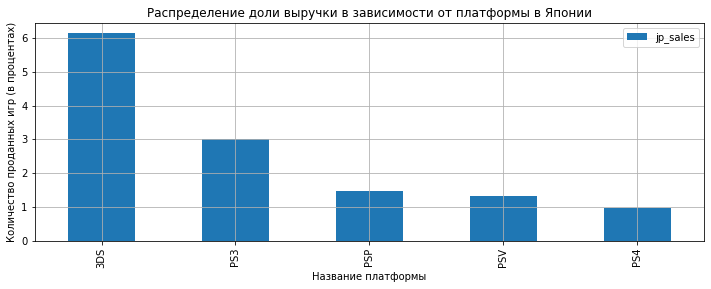

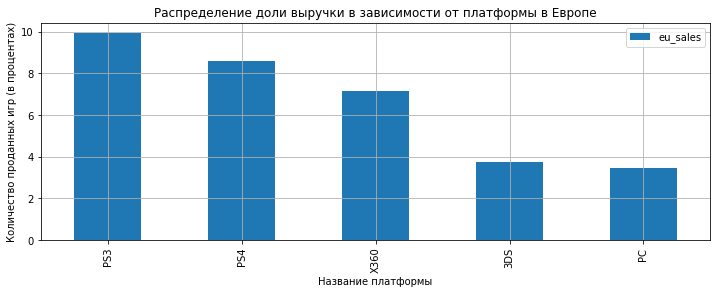

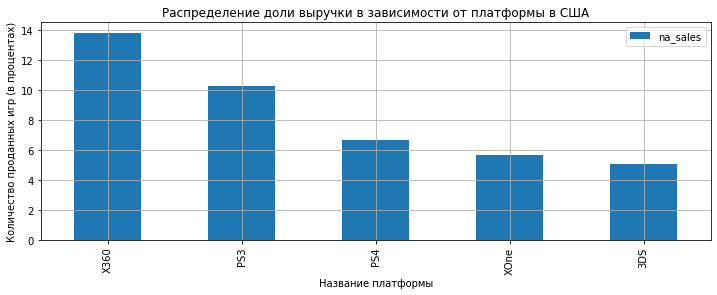

In [116]:
japan_plat.head().plot(kind='bar', grid=True, figsize=(12,4), 
                       title='Распределение доли выручки в зависимости от платформы в Японии')
plt.xlabel('Название платформы'),
plt.ylabel('Количество проданных игр (в процентах)')

europa_plat.head().plot(kind='bar', grid=True, figsize=(12,4), 
                       title='Распределение доли выручки в зависимости от платформы в Европе')
plt.xlabel('Название платформы'),
plt.ylabel('Количество проданных игр (в процентах)')

usa_plat.head().plot(kind='bar', grid=True, figsize=(12,4), 
                       title='Распределение доли выручки в зависимости от платформы в США')
plt.xlabel('Название платформы'),
plt.ylabel('Количество проданных игр (в процентах)')

#### Распределение доли выручки в зависимости от платформы по регионам (Япония, Европа, США)

---

| Платформа    |  Япония       |  Европа        |  США        |            %          |
|--------------|:-------------:|:--------------:|:-----------:|----------------------:|
|PS4           |  0.97         |  8.6           |  6.63       |      16.2  %          |
|PS3           |  3.01         |  9.95          |  10.26      |      23.22 %          |
|PSP           |  1.47         |  0             |  0          |       1.47 %          |
|PSV           |  1.33         |  0             |  0          |       1.33 %          |
|3DS           |  6.14         |  3.74          |  5.04       |      14.92 %          | 
|PC            |  0            |  3.46          |  0          |       3.46 %          |
|X360          |  0            |  7.14          |  13.83      |      20.97 %          |  
|XOne          |  0            |  0             |  5.68       |       5.68 %          |
|              |  12.92 %      |  32.89 %       |  41.44 %    |      87.25 %          | 

Как видим, по долям продаж на платформах лидирую США, на втором месте - Европа. Замыкает список Япония. Возглавляет рейтинг мировых продаж по доле от общих PS3, за ним X360. Третье и четвёртое места достались PS4 и 3DS. Пятое место - XOne. Лидеры продаж PS3 и X360 больше всего прибыли получают в США.

Посмотрим внимательнее на жанры игр

Text(0, 0.5, 'Количество проданных игр (в миллионах шт.)')

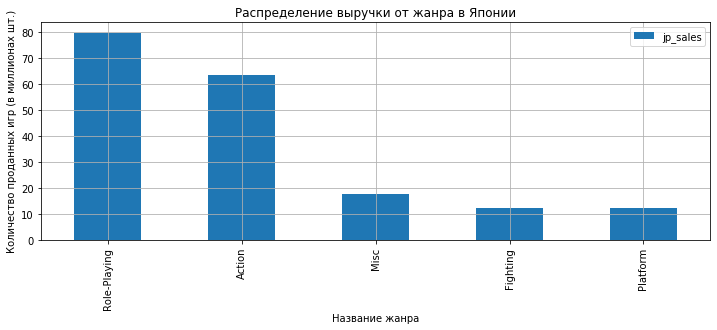

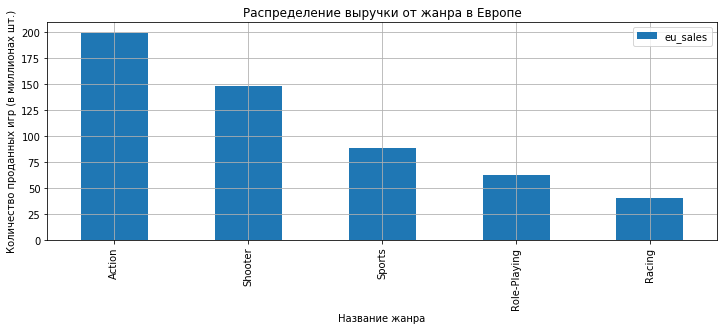

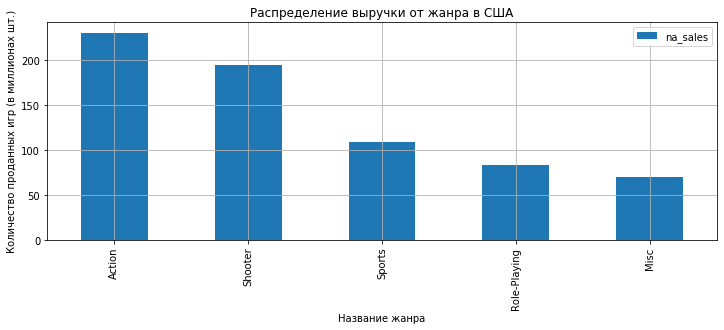

In [117]:
df_for_portrait.groupby(by='genre')\
.agg({'jp_sales':'sum'}).sort_values(by='jp_sales', 
                                     ascending=False).head(5).plot(kind='bar', 
                                                                   grid=True, figsize=(12,4), 
                                                                   title='Распределение выручки от жанра в Японии')
plt.xlabel('Название жанра'),
plt.ylabel('Количество проданных игр (в миллионах шт.)')

df_for_portrait.groupby(by='genre')\
.agg({'eu_sales':'sum'}).sort_values(by='eu_sales', 
                                     ascending=False).head(5).plot(kind='bar', 
                                                                   grid=True, figsize=(12,4), 
                                                                   title='Распределение выручки от жанра в Европе')
plt.xlabel('Название жанра'),
plt.ylabel('Количество проданных игр (в миллионах шт.)')

df_for_portrait.groupby(by='genre')\
.agg({'na_sales':'sum'}).sort_values(by='na_sales', 
                                     ascending=False).head(5).plot(kind='bar', 
                                                                   grid=True, figsize=(12,4), 
                                                                   title='Распределение выручки от жанра в США')
plt.xlabel('Название жанра'),
plt.ylabel('Количество проданных игр (в миллионах шт.)')



Посмотрим сразу на доли от общей выручки за актуальный период времени по жанрам

In [118]:
japan_genre = df_for_portrait.groupby(by='genre')\
.agg({'jp_sales':'sum'}).sort_values(by='jp_sales', 
                                     ascending=False) / sum_sales * 100
japan_genre.head()

,jp_sales
genre,
Role-Playing,4.87
Action,3.88
Misc,1.07
Fighting,0.75
Platform,0.74


In [119]:
europa_genre = df_for_portrait.groupby(by='genre')\
.agg({'eu_sales':'sum'}).sort_values(by='eu_sales', 
                                     ascending=False) / sum_sales * 100
europa_genre.head()

,eu_sales
genre,
Action,12.14
Shooter,9.03
Sports,5.40
Role-Playing,3.80
Racing,2.47


In [120]:
usa_genre = df_for_portrait.groupby(by='genre')\
.agg({'na_sales':'sum'}).sort_values(by='na_sales', 
                                     ascending=False) / sum_sales * 100
usa_genre.head()

,na_sales
genre,
Action,14.08
Shooter,11.86
Sports,6.63
Role-Playing,5.11
Misc,4.25


Text(0, 0.5, 'Количество проданных игр (в процентах)')

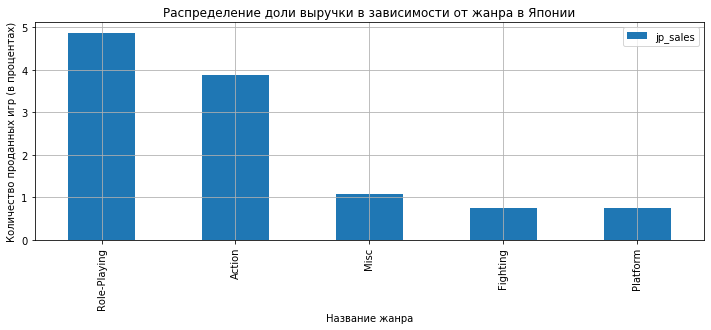

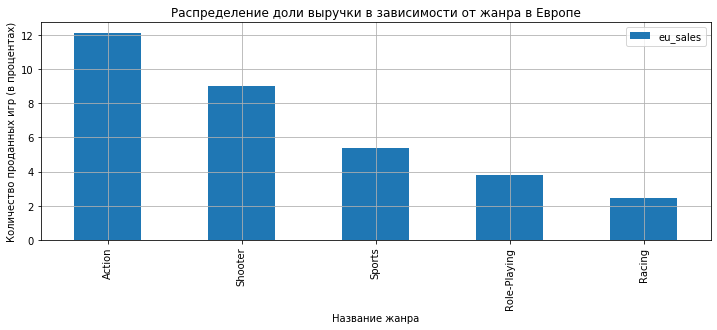

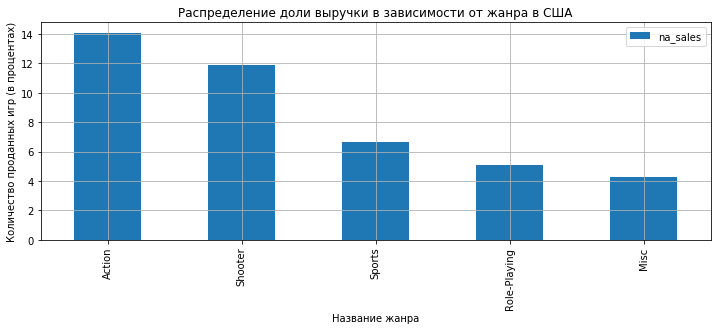

In [121]:
japan_genre.head().plot(kind='bar', grid=True, figsize=(12,4), 
                       title='Распределение доли выручки в зависимости от жанра в Японии')
plt.xlabel('Название жанра'),
plt.ylabel('Количество проданных игр (в процентах)')

europa_genre.head().plot(kind='bar', grid=True, figsize=(12,4), 
                       title='Распределение доли выручки в зависимости от жанра в Европе')
plt.xlabel('Название жанра'),
plt.ylabel('Количество проданных игр (в процентах)')

usa_genre.head().plot(kind='bar', grid=True, figsize=(12,4), 
                       title='Распределение доли выручки в зависимости от жанра в США')
plt.xlabel('Название жанра'),
plt.ylabel('Количество проданных игр (в процентах)')

#### Распределение доли выручки в зависимости от жанра по регионам (Япония, Европа, США)

---

|      Жанр    |  Япония       |  Европа        |  США        |            %          |
|--------------|:-------------:|:--------------:|:-----------:|----------------------:|
|Ролевые игры  |  4.87         |  3.8           |  5.11       |      13.78 %          |
|Экшен         |  3.88         |  12.14         |  14.08      |      30.1  %          |
|Фáйтинг       |  0.75         |  0             |  0          |       0.75 %          |
|Шу́тер         |  0            |  9.03          |  11.86      |      20.89 %          |
|Спорт. игры   |  0            |  5.40          |  6.63       |      12.03 %          | 
|Гонки         |  0            |  2.47          |  0          |       2.47 %          |
|Платфо́рмер    |  0.74         |  0             |  0          |      0.74  %          |  
|Миск          |  1.07         |  0             |  4.25       |       5.32 %          |
|              |  11.31 %      |  32.84 %       |  41.93 %    |      86.08 %          | 

Глоссарий:

Компьютерная ролевая игра (англ. Computer Role-Playing Game, обозначается аббревиатурой CRPG или RPG) — жанр компьютерных игр, основанный на элементах игрового процесса традиционных настольных ролевых игр. В ролевой игре игрок управляет одним или несколькими персонажами, каждый из которых описан набором численных характеристик, списком способностей и умений; примерами таких характеристик могут быть очки здоровья (англ. hit points, HP), показатели силы, ловкости, интеллекта, защиты, уклонения, уровень развития того или иного навыка и т. п.

Экшен (action в переводе с англ. — «действие») — жанр компьютерных игр, в котором делается упор на эксплуатацию физических возможностей игрока, в том числе координации глаз и рук и скорости реакции.

Фáйтинг (от англ. Fighting — бой, драка, поединок, борьба) — жанр компьютерных игр, имитирующих рукопашный бой малого числа персонажей в пределах ограниченного пространства, называемого арена (часть игровой вселенной, не управляемая участником игры, на которой происходят основные действия игры).

Шу́тер (Стрелялка, англ. shooter — «стрелок») — жанр компьютерных игр, в которых игровой процесс основывается на сражениях с использованием огнестрельного или любого другого оружия с видом от первого лица таким образом, чтобы игрок воспринимал происходящее глазами протагониста. В целом шутеры от первого лица обладают схожими чертами с другими шутерами, которые, в свою очередь, представляют собой один из вариантов экшн-игр.

Спортивные игры - это жанр видеоигры , который имитирует практику спорта . Большинство видов спорта было воссоздано с помощью игры, включая командные виды спорта , легкая атлетика , экстремальные виды спорта и боевые виды спорта . 

Гоночная игра (англ. racing video game) — жанр компьютерных игр с видом от первого или от третьего лица, в которых игрок принимает участие в гоночном соревновании среди наземных, водных, воздушных или космических транспортных средств.

Платфо́рмер (разг. броди́лка; англ. platformer, platform game) — жанр компьютерных игр, в которых основной чертой игрового процесса является прыгание по платформам, лазанье по лестницам, собирание предметов, обычно необходимых для завершения уровня. Игры подобного жанра характеризуются нереалистичностью, рисованной мультяшной графикой.

Миск - разносторонний, нечто разнообразное (сокращение от miscellaneous).

---

В Японии больше всего предпочитают играть в ролевые игры, в Европе и Америке - в экшен.  При этом в Японии экшен на втором месте по популярности, в то время, как в Европе и в Америке второе место дружно отдают стрелялкам. В Японии же стрелялки не входят вообще в топ-5 жанров, им предпочитают файтинг, что вероятно связано с культурой японских единоборств. Соответственно, по совокупной доле продаж за актуальный период на первом месте по выручке стоит экшен - 30.1 %. На втором месте - Стрелялки - 20.89 %. Третье и четвёртое места отдают ролевым играм (13.78 %) и спортивным играм (12.03 %). Остальные жанры отстоят от выявленной четвёрки гораздо значительнее. 

---

Посмотрим, влияет ли рейтинг ESRB на продажи в отдельном регионе?

Выведем сразу долевое распределение

In [122]:
japan_rating = df_for_portrait.groupby(by='rating')\
.agg({'jp_sales':'sum'}).sort_values(by='jp_sales', 
                                     ascending=False) / sum_sales * 100
japan_rating.head()

,jp_sales
rating,
notESRB,8.43
E,2.24
T,2.04
M,1.59
E10+,0.68


In [123]:
europa_rating = df_for_portrait.groupby(by='rating')\
.agg({'eu_sales':'sum'}).sort_values(by='eu_sales', 
                                     ascending=False) / sum_sales * 100
europa_rating.head()

,eu_sales
rating,
M,15.26
E,8.64
notESRB,7.11
T,5.07
E10+,4.76


In [124]:
usa_rating = df_for_portrait.groupby(by='rating')\
.agg({'na_sales':'sum'}).sort_values(by='na_sales', 
                                     ascending=False) / sum_sales * 100
usa_rating.head()

,na_sales
rating,
M,18.81
E,10.38
notESRB,7.54
E10+,7.18
T,6.67


Text(0, 0.5, 'Количество проданных игр (в процентах)')

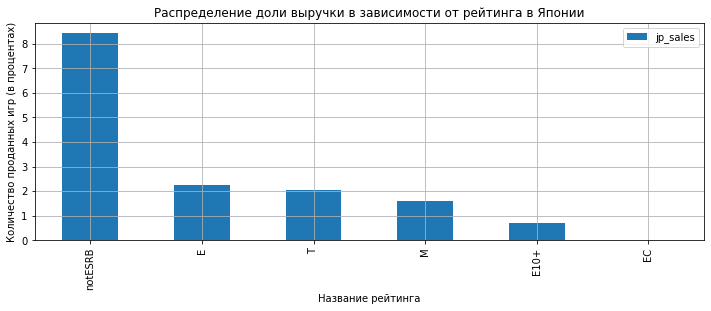

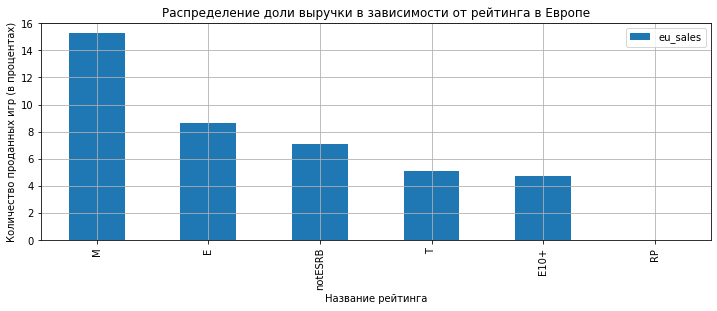

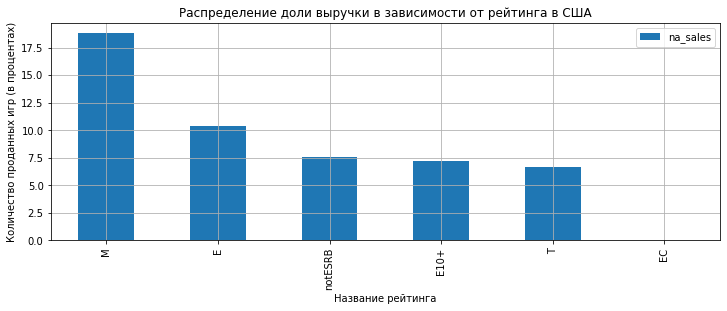

In [125]:
japan_rating.head(6).plot(kind='bar', grid=True, figsize=(12,4), 
                       title='Распределение доли выручки в зависимости от рейтинга в Японии')
plt.xlabel('Название рейтинга'),
plt.ylabel('Количество проданных игр (в процентах)')

europa_rating.head(6).plot(kind='bar', grid=True, figsize=(12,4), 
                       title='Распределение доли выручки в зависимости от рейтинга в Европе')
plt.xlabel('Название рейтинга'),
plt.ylabel('Количество проданных игр (в процентах)')

usa_rating.head(6).plot(kind='bar', grid=True, figsize=(12,4), 
                       title='Распределение доли выручки в зависимости от рейтинга в США')
plt.xlabel('Название рейтинга'),
plt.ylabel('Количество проданных игр (в процентах)')

Вспомним расшифровку рейтингов

In [126]:
rating_names

['«EC» («Early childhood») — «Для детей младшего возраста»',
 '«E» («Everyone») — «Для всех»',
 '«E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»',
 '«T» («Teen») — «Подросткам»',
 '«M» («Mature») — «Для взрослых»',
 '«AO» («Adults Only 18+») — «Только для взрослых»',
 '«RP» («Rating Pending») — «Рейтинг ожидается»',
 '"notESRB" - "пропущенные значения"']

Вспомним часть тех выводов, к которым мы пришли при изучении столбца с рейтингом:

Есть ещё одна довольно любопытная информация, почерпнутая там же, в "Википедии":

Процесс присвоения рейтинга Для определения рейтинга издатель присылает в ESRB видеоролик, который содержит наиболее впечатляющие и резкие сцены игры. Также издатель заполняет специальную анкету сведениями о содержании игры.

На веб-сайте ESRB сообщается, что затем рецензенты независимо оценивают продукт и определяют рейтинг. Оценкой рейтинга занимаются многие люди разных возрастов и слоёв общества. Это могут быть бывшие школьные учителя, родители, профессионалы и различные работники из других сфер деятельности, не связанные с игровой индустрией. Если рецензенты сходятся в оценке, то к рейтингу добавляют краткие описания и ESRB уведомляет издателя о своём решении.

Когда игра готова к продаже, издатель отправляет копии финальной версии в ESRB. Подвергается осмотру упаковка игры, а предоставленные издателем сведения о содержании игры обычно проверяются путём её тестирования. Если игра оказывается более жёсткой, чем было представлено в видеоролике, или покупатели высказываются о несоответствии рейтинга и содержимого продукта, к издателю могут быть применены различные санкции.


Обратим ещё раз внимание на последнее предложение из цитаты из "Википедии" и попробуем выжать из неё суть. Если производитель игр не уверен в том, что его игра гарантированно подпадает под соответствие рейтингу - он может не подать заявку в ESRB - дабы не попасть под санкции этой организации. Согласно законам логики вроде бы ничто не мешает сделать такой вывод, поскольку следствие закономерно истекает из посылки. За неимением иных гипотез, возьмём эту гипотезу в качестве рабочей. Будем исходить из того, что пропущенные значения в столбце с рейтингом есть ничто иное, как нежелание производителя попдпасть под санкции ESRB, а значит - отсутствие подачи заявки на присвоение рейтинга этой организацией. А значит - заменим все пропущенные значения чем-то вроде "notESRB".
    Да, и ещё маленькая зарубочка на память - если исходить из вышеприведённой аргументации, то косвенно это может указывать на то, что игры, которые в последующем будут находиться под меткой notESRB - потенциально не очень детские. Прямых доказательств тому ноль - только косвенные.



Обратим внимание на то, что даже после того, как мы указали в методе head(6) - вывести шесть типов рейтингов по номинациям, остались реальными (то есть отличающимися от нуля) только пять. И в их число подпадает "notESRB" - пропущенные значения с возможным недетским посылом. Для того, чтобы подтвердить или опровергнуть гипотезу о связи пропусков значений (отсутствие подачи заявки в ESRB) с жанром, за который можно получить санкции, необходимо больше информации (как теоретической так и практической в виде таблиц). Пока же ограничимся тем, что обратим внимание читателя этого исследования на подобную возможность.

---

В итоге мы наблюдаемм следующую картину: в Европе и в Америке лидерами продаж являются игры для взрослых. В Японии игры для взрослых занимают четвёртую позицию по градации рейтингов. Однако первую позицию в Японии занимает категория notESRB. Согласно выдвинутой ранее гипотезе, под этой позицией вполне могут присутствовать игры для взрослых. Может быть имеет значение в таком распределении присущее японцам "чувство стыда", противопоставляемое западному "чувству вины" или что-то иное. Для более детального изучения вопроса следовало бы провести дополнительно исследование (или ряд исследований).
Второе место во всех регионах отдают рейтингу «E» («Everyone») — «Для всех». Игры для подростков («T» («Teen») — «Подросткам»), игры 10+ («E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше») и пропущенные значения занимают оставшиеся места примерно в равных пропорциях.

## Шаг 5. Проверить гипотезы

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
Задать самостоятельно пороговое значение alpha.
Пояснить:

Как мы сформулировали нулевую и альтернативную гипотезы;
Какой критерий применили для проверки гипотез и почему.

Будем использовать t-критерий Стьюдента, так как сравниваемые выборки независимы между собой.

#### **Гипотезы:**


- H0: средние пользовательские рейтинги платформ Xbox One и PC одинаковые
- H1: средние пользовательские рейтинги платформ Xbox One и PC различаются

Зададим пороговое значение alpha.

In [127]:
alpha = 0.05

In [128]:
Xbox = df[(df['platform'] == 'XOne') & (df['user_score'] > 0)]['user_score']
PC = df[(df['platform'] == 'PC') & (df['user_score'] > 0)]['user_score']

In [129]:
result = st.ttest_ind(Xbox, PC)

In [130]:
print('p-значение:', result.pvalue)

if (result.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.5564641067937523e-05
Отвергаем нулевую гипотезу


#### **Гипотезы:**


- H0: средние пользовательские рейтинги жанров Action и Sports одинаковые
- H1: средние пользовательские рейтинги жанров Action и Sports разные

In [131]:
Action = df[(df['genre'] == 'Action') & (df['user_score'] > 0)]['user_score']
Sports = df[(df['genre'] == 'Sports') & (df['user_score'] > 0)]['user_score']

In [132]:
result = st.ttest_ind(Action, Sports)

In [133]:
print('p-значение:', result.pvalue)

if (result.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.1520831955066276
Не получилось отвергнуть нулевую гипотезу


## Выводы:

- Количество выпущенных игр неизменно росло вплоть до 2007 года. Этот год являлся пиком по количеству выпущенных игр. Начиная с 2008 года мы наблюдаем постепенное сокращение производства игр. Кривая падения более или менее выравнивается только к 2012 году.
- Срок жизни платформ - 11, 12 лет. Какие-то платформы резко стартуют, набирая большое количество продаж (Платформы 'Wii', 'PS2'), другие плавно стартуют и плавно финишируют. Общим, кроме срока жизни, для них также является то, что после пика своей популярности происходит неизменное падение продаж. Приходит новая платформа и занимает место старой.
- Пятёрка потенциально прибыльных платформ, на которые стоит обратить внимание в 2017 году (по имеющейся легенде):
    - 'WiiU'
    - 'X360'
    - 'XOne'
    - 'PS4'
    - '3DS' 
- После построения "ящиков с усами" мы обнаружили, что наиболее перспективной платформой представляется PS4, наименее - 3DS. 
- Оценки критиков и пользователей имеют слабую или очень слабую корреляцию с продажей игр на платформе. Такая ситуация в равной мере характерна для всех пяти перспективных платформ, которые мы выделили ранее.
- Самый популярный (прибыльный) жанр - Action. Этот жанр больше чем на порядок по принесению прибыли отличается от самого низкодоходного - Strategy.
- В абсолютных величинах по продажам на платформах лидирует Америка и её фаворит - X360. Между тем, в Европе эта платформа занимает лишь третье место по продажам, а в Японии она вообще не присутствует в пятёрке лидеров. При этом такие платформы, как PS3, PS4, 3DS входят в состав топ-5 каждого из рассматриваемых регионов. По долям продаж на платформах лидируют США, на втором месте - Европа. Замыкает список Япония. Возглавляет рейтинг мировых продаж по доле от общих PS3, за ним X360. Третье и четвёртое места достались PS4 и 3DS. Пятое место - XOne. Лидеры продаж PS3 и X360 больше всего прибыли получают в США.
- В Японии больше всего предпочитают играть в ролевые игры, в Европе и Америке - в экшен. При этом в Японии экшен на втором месте по популярности, в то время, как в Европе и в Америке второе место дружно отдают стрелялкам. В Японии же стрелялки не входят вообще в топ-5 жанров, им предпочитают файтинг, что вероятно связано с культурой японских единоборств. Соответственно, по совокупной доле продаж за актуальный период на первом месте по выручке стоит экшен - 30.1 %. На втором месте - Стрелялки - 20.89 %. Третье и четвёртое места отдают ролевым играм (13.78 %) и спортивным играм (12.03 %). Остальные жанры отстоят от выявленной четвёрки гораздо значительнее.
- В Европе и в Америке лидерами продаж являются игры для взрослых. В Японии игры для взрослых занимают четвёртую позицию по градации рейтингов. Однако первую позицию в Японии занимает категория notESRB. Согласно выдвинутой ранее гипотезе, под этой позицией вполне могут присутствовать игры для взрослых. Может быть имеет значение в таком распределении присущее японцам "чувство стыда", противопоставляемое западному "чувству вины" или что-то иное. Для более детального изучения вопроса следовало бы провести дополнительно исследование (или ряд исследований). Второе место во всех регионах отдают рейтингу «E» («Everyone») — «Для всех». Игры для подростков («T» («Teen») — «Подросткам»), игры 10+ («E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше») и пропущенные значения занимают оставшиеся места примерно в равных пропорциях.
- Средние пользовательские рейтинги платформ Xbox One и PC различаются
- Средние пользовательские рейтинги жанров Action и Sports одинаковые